<a href="https://colab.research.google.com/github/Mohammad-Kaosain-Akbar/NILM-Analysis-with-different-methods/blob/main/NILM_Data_Analysis_for_different_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/NILM-two-years-dataset/main/Data_Greener_all.csv')
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)

In [ ]:
Total = df["Ventilation"] + df["Sokets plug"] + df["Lighting"] + df["Other electricity"] + df["Cooling"] + df["Heating"]

In [ ]:
df["Total"] = Total
df

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total
0,2017-01-03 13:00:00,27.4,41.8,53.7,89.6,18.60,498.0,729.10
1,2017-01-03 14:00:00,21.6,37.5,50.9,64.6,61.90,500.0,736.50
2,2017-01-03 15:00:00,18.5,37.4,60.1,64.2,16.50,480.0,676.70
3,2017-01-03 16:00:00,29.7,38.0,52.6,43.2,19.80,390.0,573.30
4,2017-01-03 17:00:00,16.7,38.1,56.7,42.4,15.20,373.0,542.10
...,...,...,...,...,...,...,...,...
43819,2022-01-03 08:00:00,59.3,17.9,16.6,115.0,12.70,344.0,565.50
43820,2022-01-03 09:00:00,71.9,20.6,33.1,149.0,11.90,399.0,685.50
43821,2022-01-03 10:00:00,90.5,30.9,47.8,157.0,12.90,397.0,736.10
43822,2022-01-03 11:00:00,94.0,33.9,52.2,155.0,15.40,345.0,695.50


In [ ]:
df['Day']=df['Time'].dt.day
df['Month']=df['Time'].dt.month
df['Week']=df['Time'].dt.week # week of the year
df['Year']=df['Time'].dt.year
df['Hour']=df['Time'].dt.hour

df['Day of week']=df['Time'].dt.dayofweek
df['Day of year']=df['Time'].dt.dayofyear
df['Quarter']=df['Time'].dt.quarter 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Day,Month,Week,Year,Hour,Day of week,Day of year,Quarter
0,2017-01-03 13:00:00,27.4,41.8,53.7,89.6,18.60,498.0,729.10,3,1,1,2017,13,1,3,1
1,2017-01-03 14:00:00,21.6,37.5,50.9,64.6,61.90,500.0,736.50,3,1,1,2017,14,1,3,1
2,2017-01-03 15:00:00,18.5,37.4,60.1,64.2,16.50,480.0,676.70,3,1,1,2017,15,1,3,1
3,2017-01-03 16:00:00,29.7,38.0,52.6,43.2,19.80,390.0,573.30,3,1,1,2017,16,1,3,1
4,2017-01-03 17:00:00,16.7,38.1,56.7,42.4,15.20,373.0,542.10,3,1,1,2017,17,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2022-01-03 08:00:00,59.3,17.9,16.6,115.0,12.70,344.0,565.50,3,1,1,2022,8,0,3,1
43820,2022-01-03 09:00:00,71.9,20.6,33.1,149.0,11.90,399.0,685.50,3,1,1,2022,9,0,3,1
43821,2022-01-03 10:00:00,90.5,30.9,47.8,157.0,12.90,397.0,736.10,3,1,1,2022,10,0,3,1
43822,2022-01-03 11:00:00,94.0,33.9,52.2,155.0,15.40,345.0,695.50,3,1,1,2022,11,0,3,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f030ca022d0>,
      dtype=object)

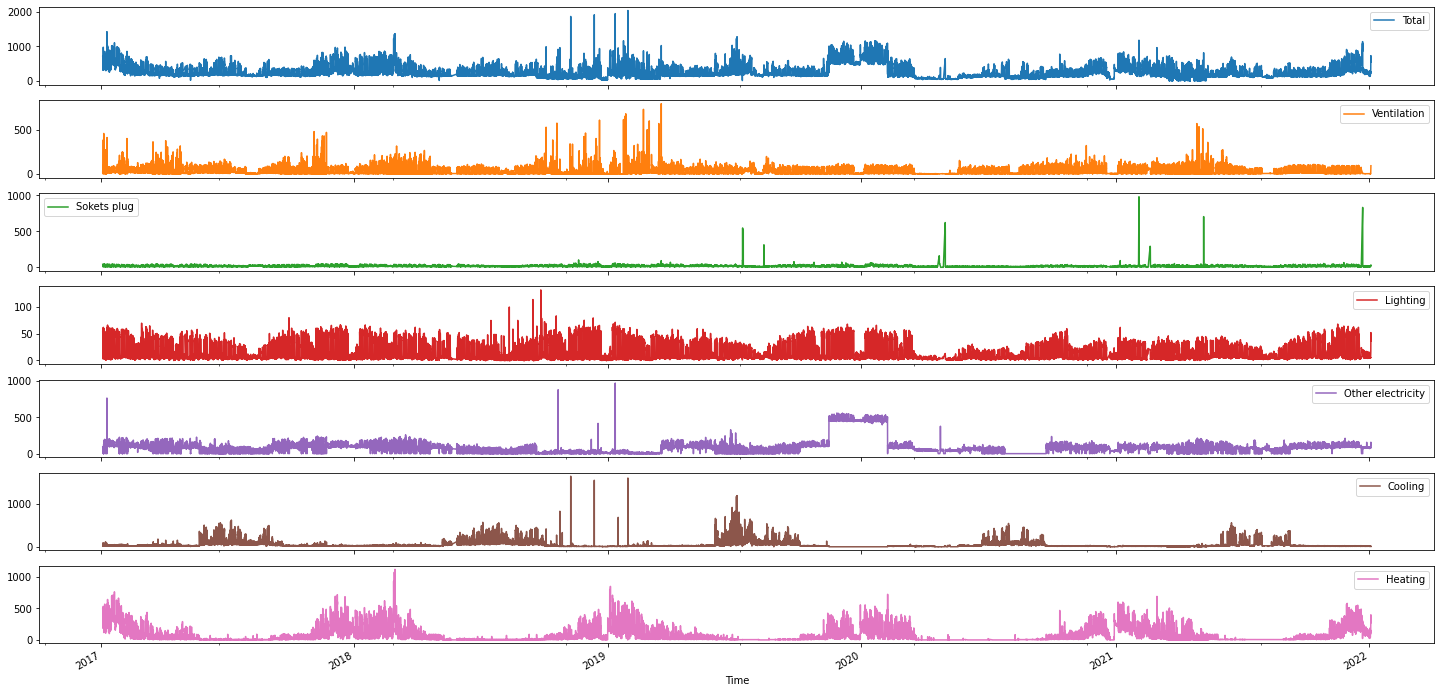

In [ ]:
from IPython.display import Image, display
mpl.rcParams['figure.figsize'] = (45,19)
mpl.rcParams['axes.grid'] = False

mpl.rcParams['figure.figsize'] = (25,13)
mpl.rcParams['axes.grid'] = False
df.set_index('Time')[['Total','Ventilation',	'Sokets plug', 'Lighting',	'Other electricity',	'Cooling',	'Heating']].plot(subplots=True)


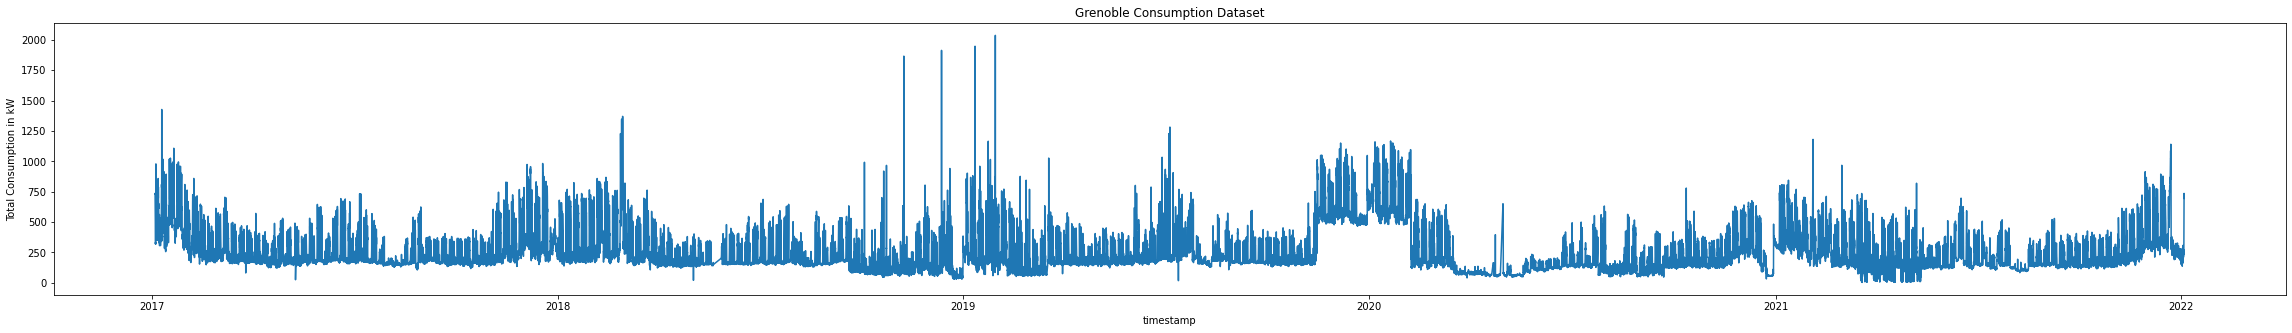

In [ ]:
fig, ax = plt.subplots(figsize=(40, 5))
ax.plot(df.iloc[0:43823]['Time'], df.iloc[0:43823]['Total'])
ax.set_title('Grenoble Consumption Dataset')
plt.xlabel('timestamp')
plt.ylabel('Total Consumption in kW')
plt.show()

Whole Year

In [ ]:
y2017 = df.loc[(df['Year'].isin([2017]))]
y2018 = df.loc[(df['Year'].isin([2018]))]
y2019 = df.loc[(df['Year'].isin([2019]))]
y2020 = df.loc[(df['Year'].isin([2020]))]
y2021 = df.loc[(df['Year'].isin([2021]))]
y2022 = df.loc[(df['Year'].isin([2022]))]

Summer

In [ ]:
sum2017 = df.loc[(df['Year'].isin([2017]))&(df['Month'].isin([6,7,8]))]
sum2018 = df.loc[(df['Year'].isin([2018]))&(df['Month'].isin([6,7,8]))]
sum2019 = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([6,7,8]))]
sum2020 = df.loc[(df['Year'].isin([2020]))&(df['Month'].isin([6,7,8]))]
sum2021 = df.loc[(df['Year'].isin([2021]))&(df['Month'].isin([6,7,8]))]
sum2022 = df.loc[(df['Year'].isin([2022]))&(df['Month'].isin([6,7,8]))]

Winter

In [ ]:
win2017 = df.loc[(df['Year'].isin([2017]))&(df['Month'].isin([12,1,2]))]
win2018 = df.loc[(df['Year'].isin([2018]))&(df['Month'].isin([12,1,2]))]
win2019 = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([12,1,2]))]
win2020 = df.loc[(df['Year'].isin([2020]))&(df['Month'].isin([12,1,2]))]
win2021 = df.loc[(df['Year'].isin([2021]))&(df['Month'].isin([12,1,2]))]
win2022 = df.loc[(df['Year'].isin([2022]))&(df['Month'].isin([12,1,2]))]

Spring

In [ ]:
spr2017 = df.loc[(df['Year'].isin([2017]))&(df['Month'].isin([3,4,5]))]
spr2018 = df.loc[(df['Year'].isin([2018]))&(df['Month'].isin([3,4,5]))]
spr2019 = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([3,4,5]))]
spr2020 = df.loc[(df['Year'].isin([2020]))&(df['Month'].isin([3,4,5]))]
spr2021 = df.loc[(df['Year'].isin([2021]))&(df['Month'].isin([3,4,5]))]
spr2022 = df.loc[(df['Year'].isin([2022]))&(df['Month'].isin([3,4,5]))]

Fall

In [ ]:
fall2017 = df.loc[(df['Year'].isin([2017]))&(df['Month'].isin([9,10,11]))]
fall2018 = df.loc[(df['Year'].isin([2018]))&(df['Month'].isin([9,10,11]))]
fall2019 = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([9,10,11]))]
fall2020 = df.loc[(df['Year'].isin([2020]))&(df['Month'].isin([9,10,11]))]
fall2021 = df.loc[(df['Year'].isin([2021]))&(df['Month'].isin([9,10,11]))]
fall2022 = df.loc[(df['Year'].isin([2022]))&(df['Month'].isin([9,10,11]))]

Working Hours 9am-7pm

In [ ]:
wh1718 = df.loc[(df['Year'].isin([2017,2018]))&(df['Day of week'].isin([0,1,2,3,4]))&(df['Hour'].isin([9,10,11,12,13,14,15,16,17,18,19]))]
wh19 = df.loc[(df['Year'].isin([2019]))&(df['Day of week'].isin([0,1,2,3,4]))&(df['Hour'].isin([9,10,11,12,13,14,15,16,17,18,19]))]

Non Working Hours 7pm - 9 am

In [ ]:
nwh1718 = df.loc[(df['Year'].isin([2017,2018]))&(df['Day of week'].isin([0,1,2,3,4]))&(df['Hour'].isin([20,21,22,23,0,1,2,3,4,5,6,7,8]))]
nwh19 = df.loc[(df['Year'].isin([2019]))&(df['Day of week'].isin([0,1,2,3,4]))&(df['Hour'].isin([20,21,22,23,0,1,2,3,4,5,6,7,8]))]

Weekends

In [ ]:
wend1718 = df.loc[(df['Year'].isin([2017,2018]))&(df['Day of week'].isin([5,6]))]
wend19 = df.loc[(df['Year'].isin([2019]))&(df['Day of week'].isin([5,6]))]

# **PIE CHARTS**

# **Method 1**

Training (2017-2018)




In [ ]:
a = y2017['Ventilation'].sum() + y2018['Ventilation'].sum()
b = y2017['Sokets plug'].sum() + y2018['Sokets plug'].sum()
c = y2017['Lighting'].sum() + y2018['Lighting'].sum()
d = y2017['Other electricity'].sum() + y2018['Other electricity'].sum()
e = y2017['Cooling'].sum() + y2018['Cooling'].sum()
f = y2017['Heating'].sum() + y2018['Heating'].sum()
Total = y2017['Total'].sum() + y2018['Total'].sum()


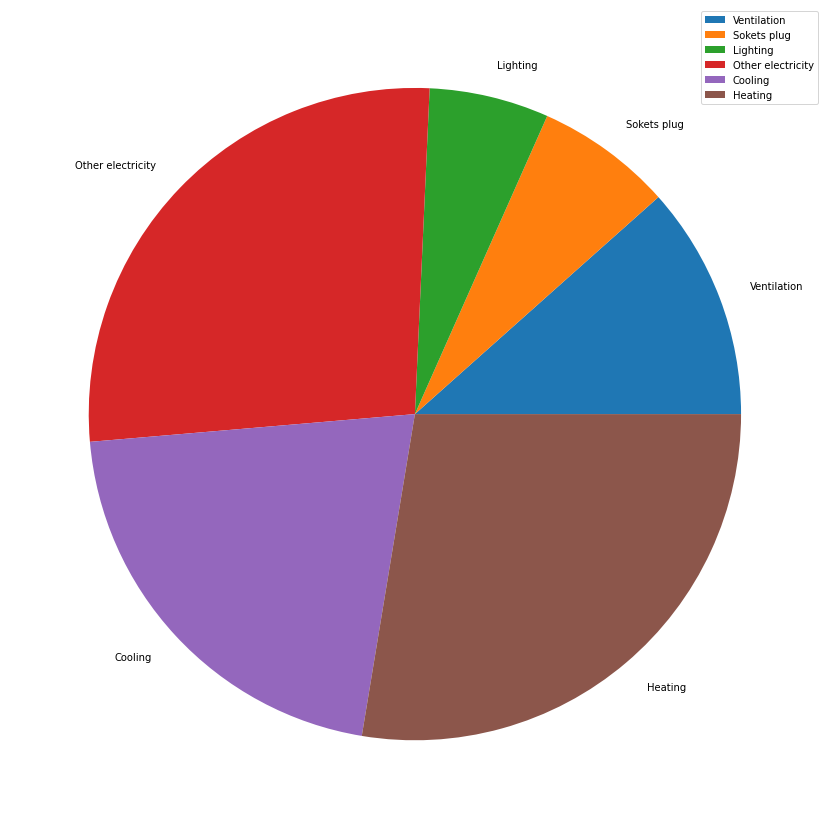

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

Testing (2019)

In [ ]:
a = y2019['Ventilation'].sum() 
b = y2019['Sokets plug'].sum()
c = y2019['Lighting'].sum() 
d = y2019['Other electricity'].sum() 
e = y2019['Cooling'].sum() 
f = y2019['Heating'].sum() 
Total = y2019['Total'].sum() 


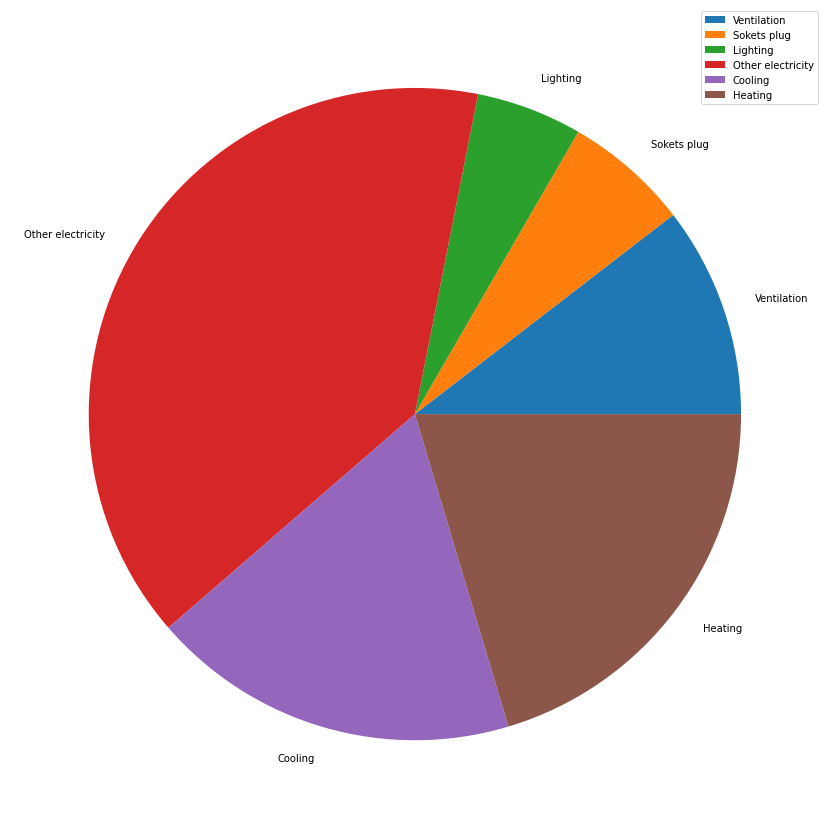

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

# **Method 2**

Training Summer of 2017-2018

In [ ]:
a = sum2017['Ventilation'].sum() + sum2018['Ventilation'].sum()
b = sum2017['Sokets plug'].sum() + sum2018['Sokets plug'].sum()
c = sum2017['Lighting'].sum() + sum2018['Lighting'].sum()
d = sum2017['Other electricity'].sum() + sum2018['Other electricity'].sum()
e = sum2017['Cooling'].sum() + sum2018['Cooling'].sum()
f = sum2017['Heating'].sum() + sum2018['Heating'].sum()
Total = sum2017['Total'].sum() + sum2018['Total'].sum()


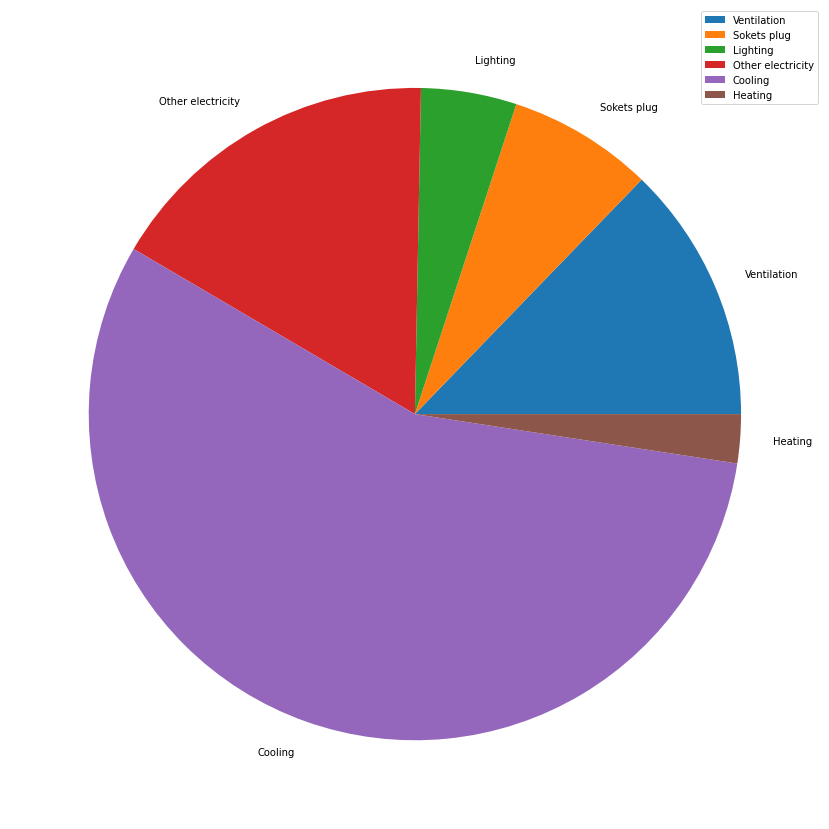

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

Testing Summer of 2019

In [ ]:
a = sum2019['Ventilation'].sum() 
b = sum2019['Sokets plug'].sum()
c = sum2019['Lighting'].sum() 
d = sum2019['Other electricity'].sum() 
e = sum2019['Cooling'].sum() 
f = sum2019['Heating'].sum() 
Total = sum2019['Total'].sum() 

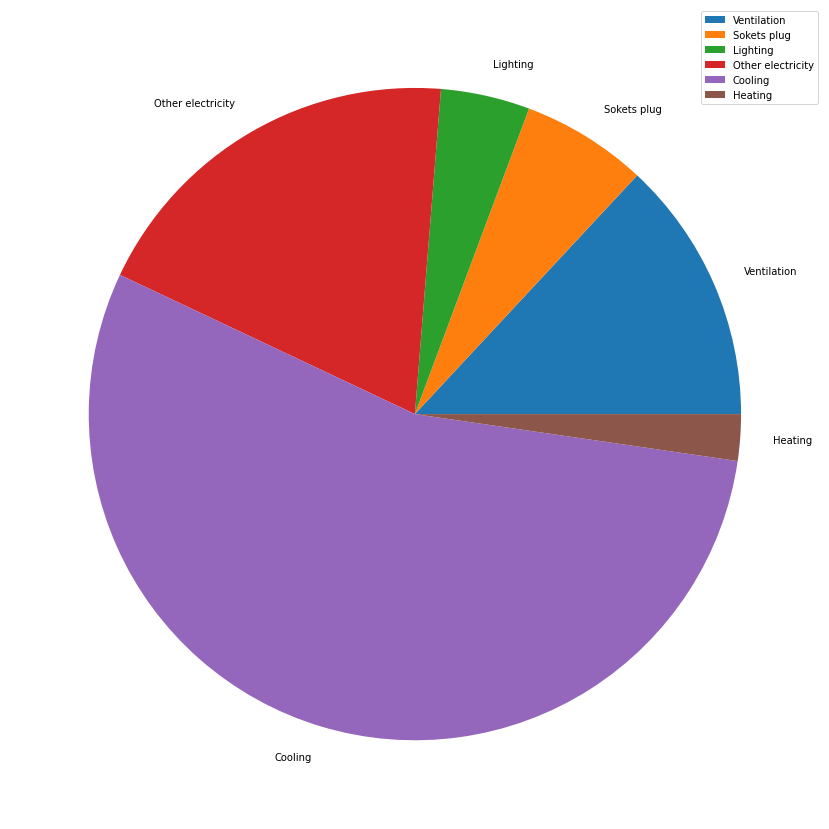

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

# **Method 3**

Training using Winter 2017 - 2018

In [ ]:
a = win2017['Ventilation'].sum() + win2018['Ventilation'].sum()
b = win2017['Sokets plug'].sum() + win2018['Sokets plug'].sum()
c = win2017['Lighting'].sum() + win2018['Lighting'].sum()
d = win2017['Other electricity'].sum() + win2018['Other electricity'].sum()
e = win2017['Cooling'].sum() + win2018['Cooling'].sum()
f = win2017['Heating'].sum() + win2018['Heating'].sum()
Total = win2017['Total'].sum() + win2018['Total'].sum()


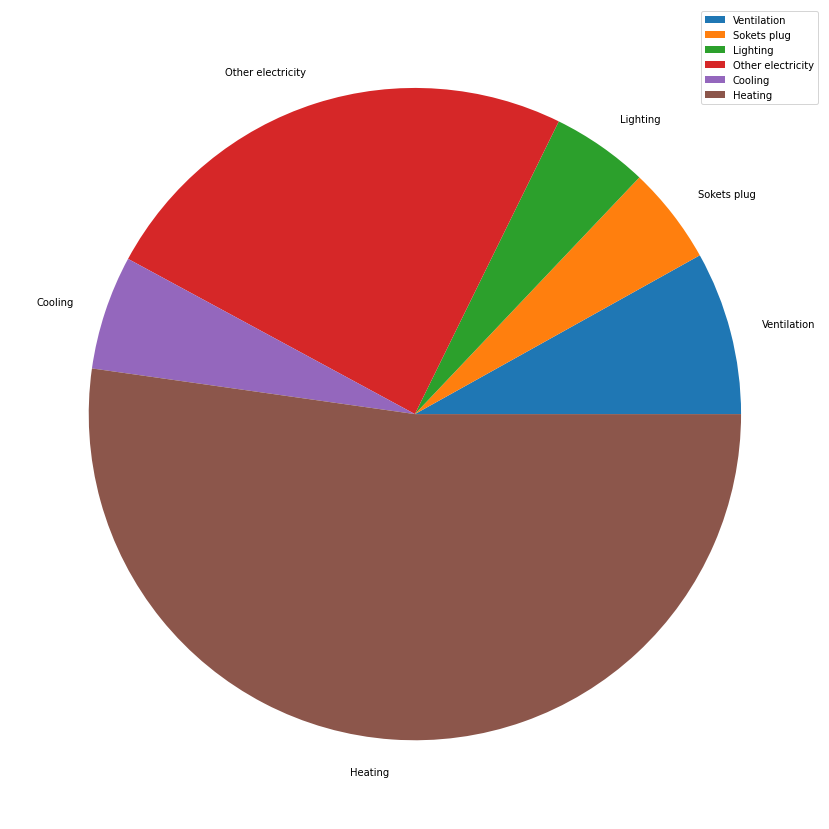

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

Testing using Winter 2019

In [ ]:
a = win2019['Ventilation'].sum() 
b = win2019['Sokets plug'].sum()
c = win2019['Lighting'].sum() 
d = win2019['Other electricity'].sum() 
e = win2019['Cooling'].sum() 
f = win2019['Heating'].sum() 
Total = win2019['Total'].sum() 

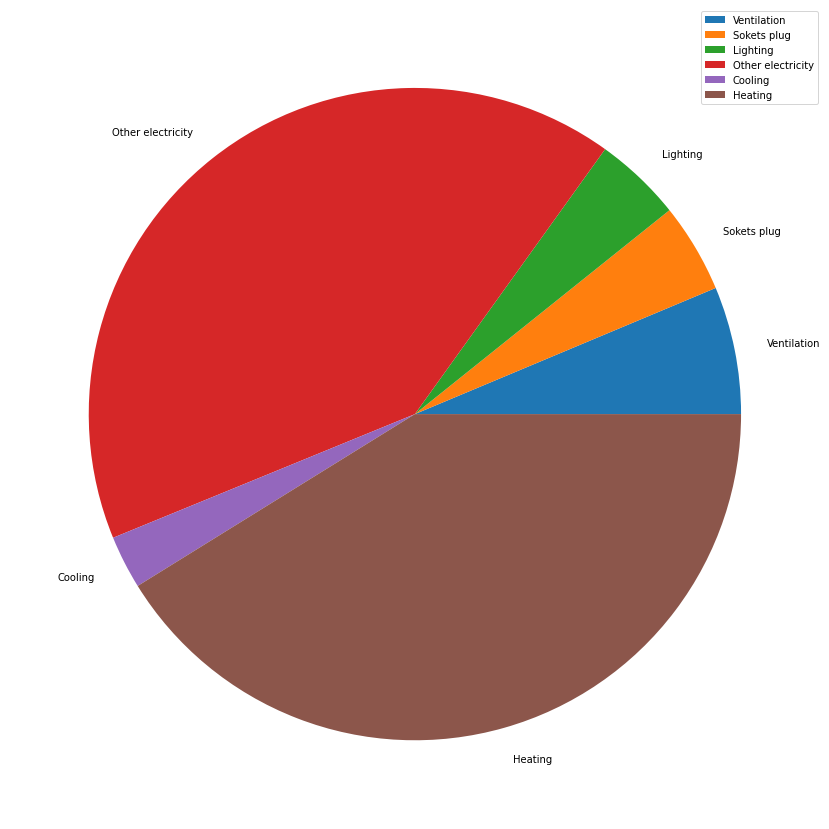

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

# **Method 4**

Training using Spring of 2017 and 2018

In [ ]:
a = spr2017['Ventilation'].sum() + spr2018['Ventilation'].sum()
b = spr2017['Sokets plug'].sum() + spr2018['Sokets plug'].sum()
c = spr2017['Lighting'].sum() + spr2018['Lighting'].sum()
d = spr2017['Other electricity'].sum() + spr2018['Other electricity'].sum()
e = spr2017['Cooling'].sum() + spr2018['Cooling'].sum()
f = spr2017['Heating'].sum() + spr2018['Heating'].sum()
Total = spr2017['Total'].sum() + spr2018['Total'].sum()


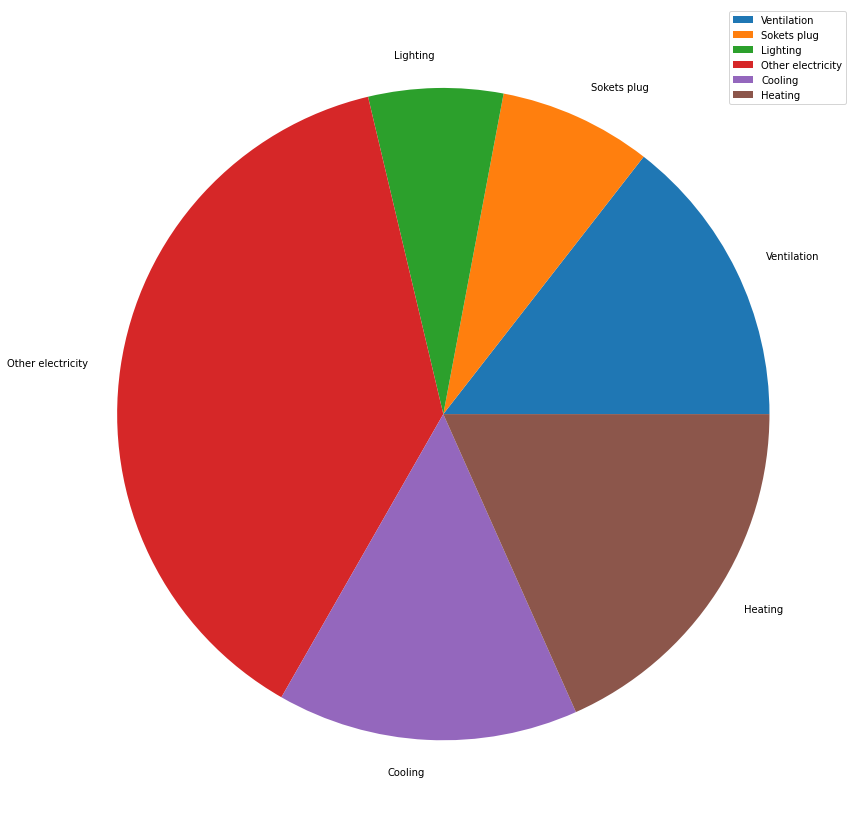

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

Testing using Spring of 2019

In [ ]:
a = spr2019['Ventilation'].sum() 
b = spr2019['Sokets plug'].sum()
c = spr2019['Lighting'].sum() 
d = spr2019['Other electricity'].sum() 
e = spr2019['Cooling'].sum() 
f = spr2019['Heating'].sum() 
Total = spr2019['Total'].sum() 


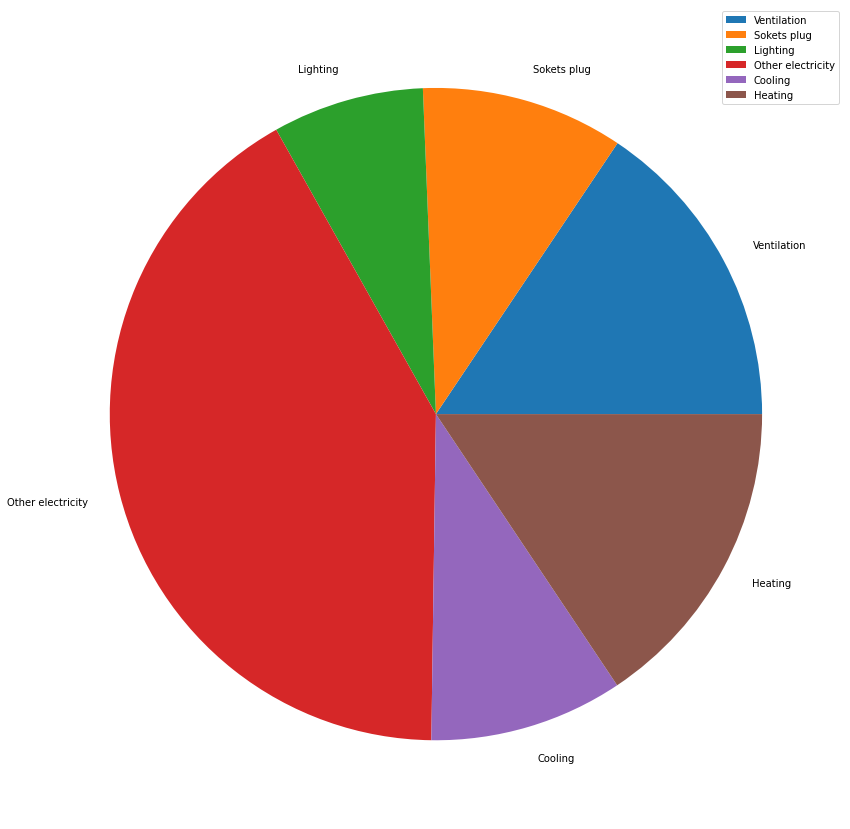

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

# **Method 5**

Training using Fall of 2017-2018

In [ ]:
a = fall2017['Ventilation'].sum() + fall2018['Ventilation'].sum()
b = fall2017['Sokets plug'].sum() + fall2018['Sokets plug'].sum()
c = fall2017['Lighting'].sum() + fall2018['Lighting'].sum()
d = fall2017['Other electricity'].sum() + fall2018['Other electricity'].sum()
e = fall2017['Cooling'].sum() + fall2018['Cooling'].sum()
f = fall2017['Heating'].sum() + fall2018['Heating'].sum()
Total = fall2017['Total'].sum() + fall2018['Total'].sum()


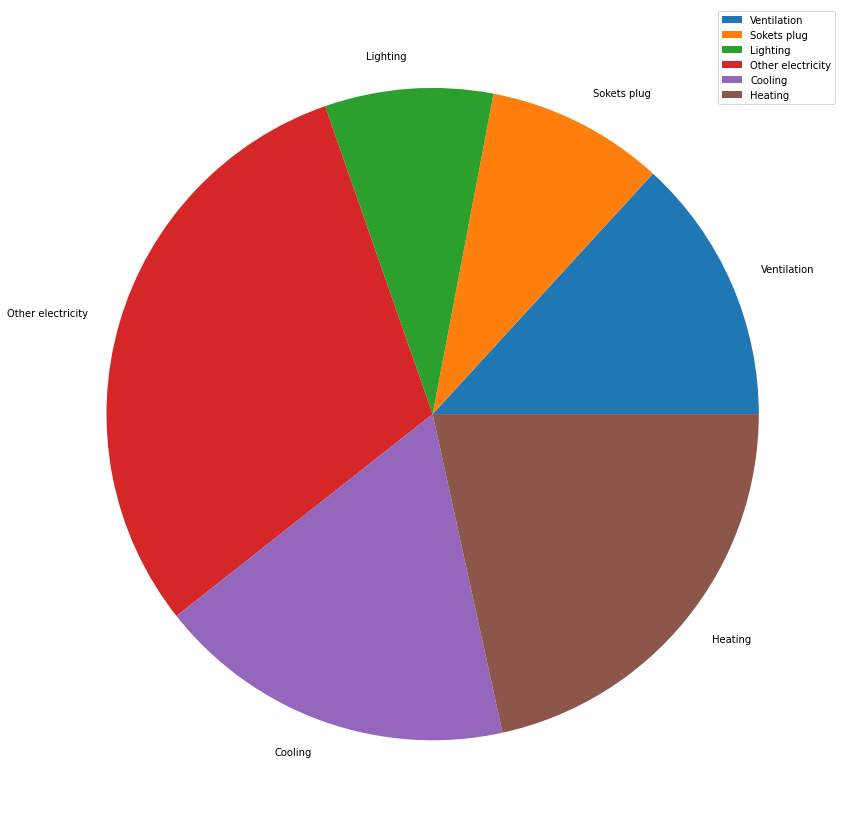

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

Testing using Fall of 2019

In [ ]:
a = fall2019['Ventilation'].sum() 
b = fall2019['Sokets plug'].sum()
c = fall2019['Lighting'].sum() 
d = fall2019['Other electricity'].sum() 
e = fall2019['Cooling'].sum() 
f = fall2019['Heating'].sum() 
Total = fall2019['Total'].sum() 


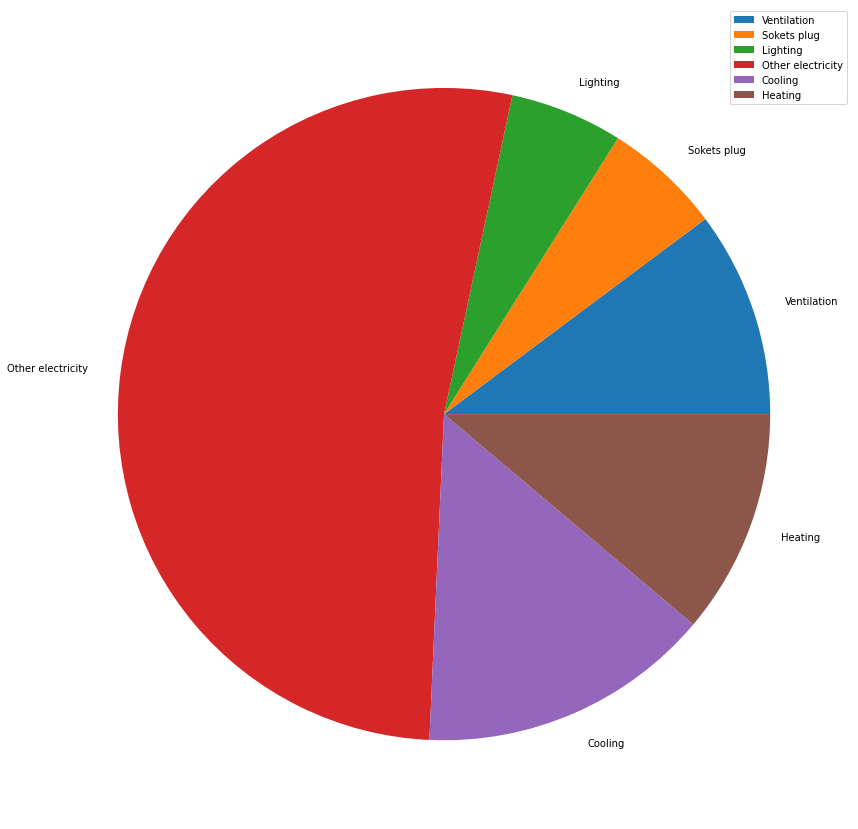

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

# **Method 6**

Training using working hours data of 2017 to 2018

In [ ]:
a = wh1718['Ventilation'].sum() 
b = wh1718['Sokets plug'].sum()
c = wh1718['Lighting'].sum() 
d = wh1718['Other electricity'].sum() 
e = wh1718['Cooling'].sum() 
f = wh1718['Heating'].sum() 
Total = wh1718['Total'].sum() 

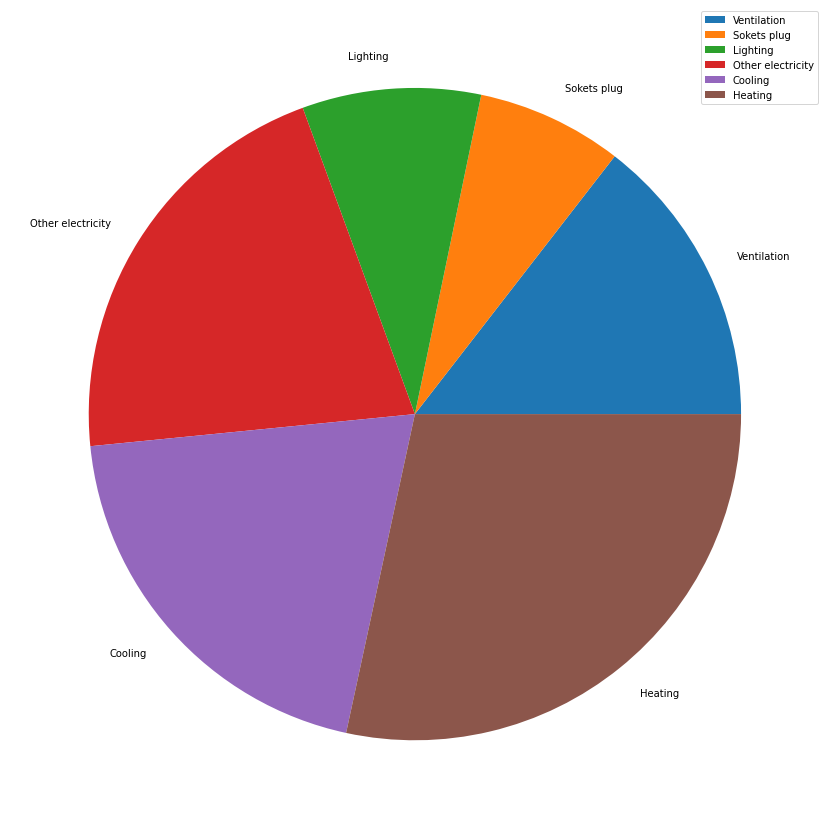

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

Training using working hours data of 2017 to 2018

In [ ]:
a = wh19['Ventilation'].sum() 
b = wh19['Sokets plug'].sum()
c = wh19['Lighting'].sum() 
d = wh19['Other electricity'].sum() 
e = wh19['Cooling'].sum() 
f = wh19['Heating'].sum() 
Total = wh19['Total'].sum() 

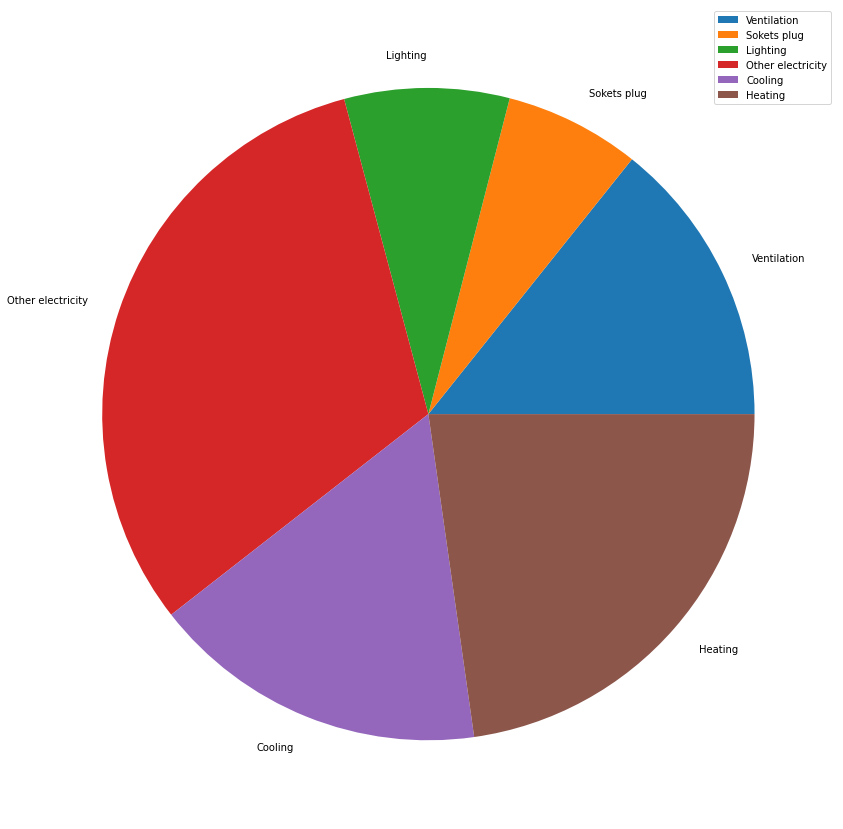

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

# **Method 7**

Training using non working hours data of 2017 to 2018

In [ ]:
a = nwh1718['Ventilation'].sum() 
b = nwh1718['Sokets plug'].sum()
c = nwh1718['Lighting'].sum() 
d = nwh1718['Other electricity'].sum() 
e = nwh1718['Cooling'].sum() 
f = nwh1718['Heating'].sum() 
Total = nwh1718['Total'].sum() 


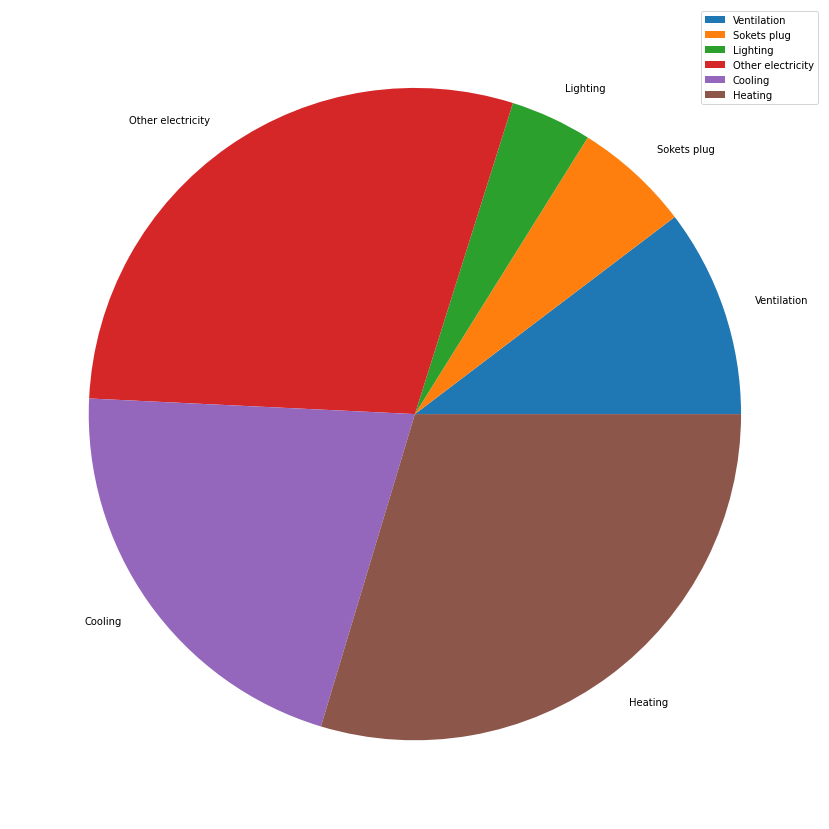

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

Testing using non working hours data of 2019

In [ ]:
a = nwh19['Ventilation'].sum() 
b = nwh19['Sokets plug'].sum()
c = nwh19['Lighting'].sum() 
d = nwh19['Other electricity'].sum() 
e = nwh19['Cooling'].sum() 
f = nwh19['Heating'].sum() 
Total = nwh19['Total'].sum() 



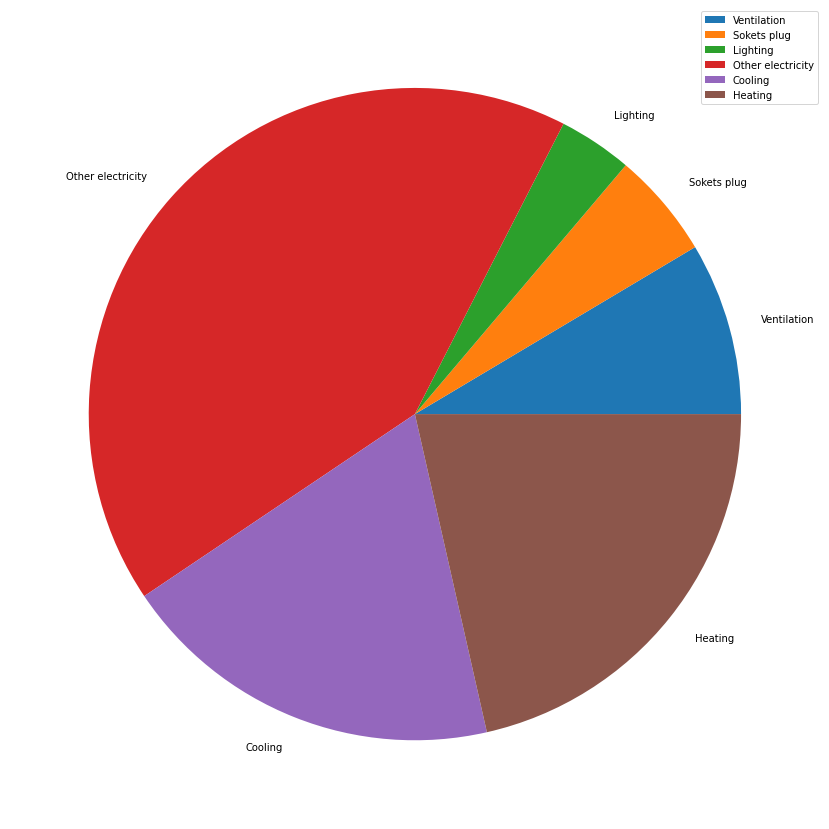

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

# **Method 8**

Training using weekend data of 2017 to 2018

In [ ]:
a = wend1718['Ventilation'].sum() 
b = wend1718['Sokets plug'].sum()
c = wend1718['Lighting'].sum() 
d = wend1718['Other electricity'].sum() 
e = wend1718['Cooling'].sum() 
f = wend1718['Heating'].sum() 
Total = wend1718['Total'].sum() 

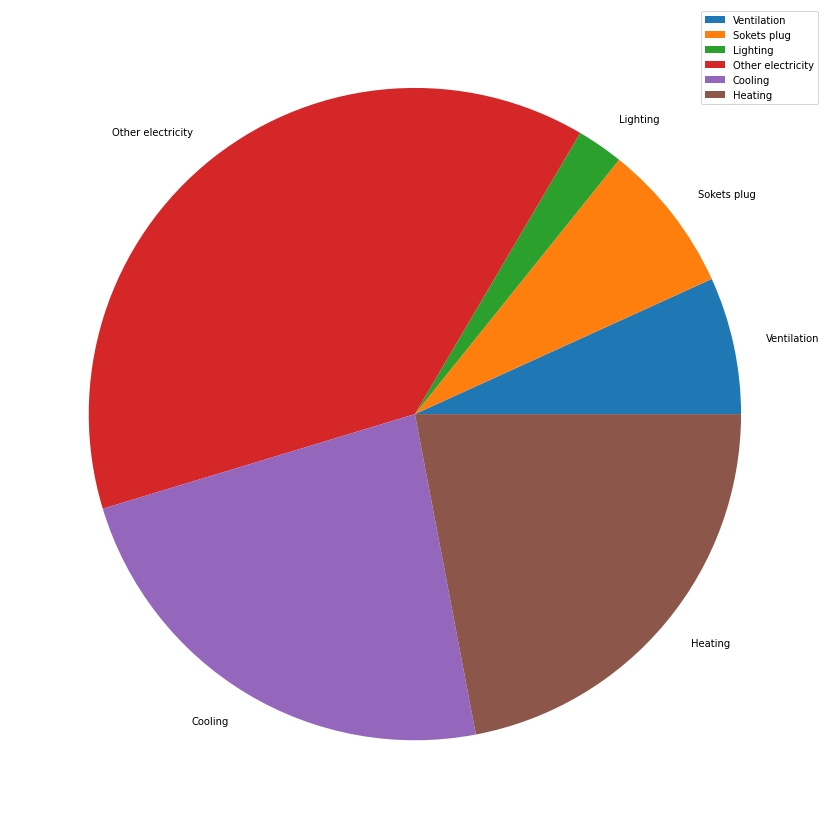

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]
                   },
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

Testing using weekend data of 2019

In [ ]:
a = wend19['Ventilation'].sum() 
b = wend19['Sokets plug'].sum()
c = wend19['Lighting'].sum() 
d = wend19['Other electricity'].sum() 
e = wend19['Cooling'].sum() 
f = wend19['Heating'].sum() 
Total = wend19['Total'].sum() 

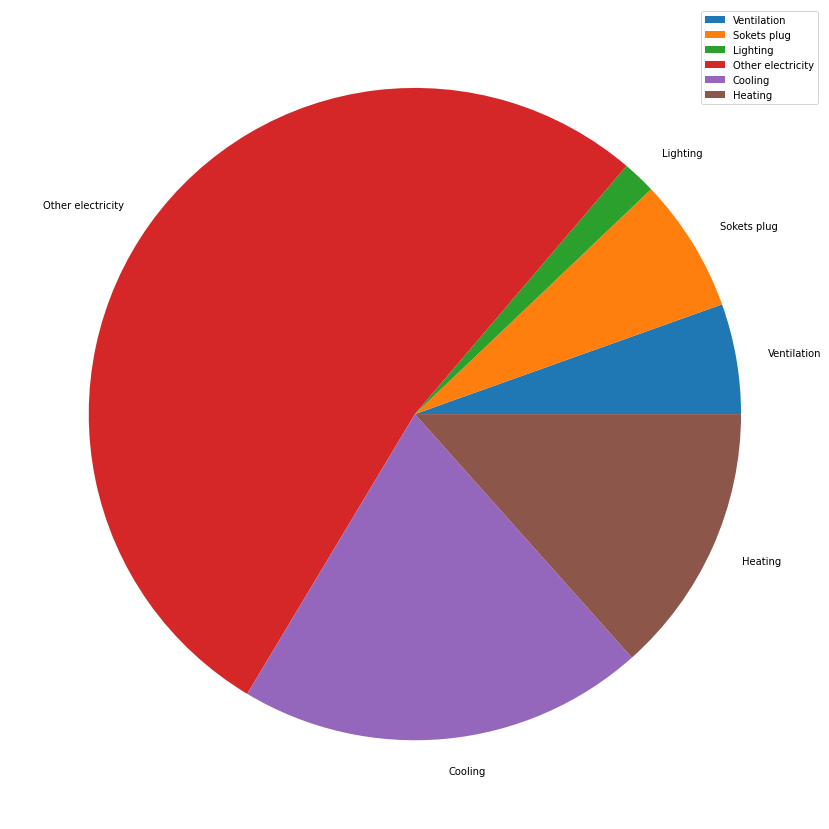

In [ ]:
pl = pd.DataFrame({'': [a,b,c,d,e,f]},
                  index=['Ventilation', 'Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating'])
plot = pl.plot.pie(y='', figsize=(15, 15))

# **Different Appliance Consumption in different Seasons of 2017**



In [ ]:
# 2017 ventilation consumption over different seasons

a = y2017.loc[:, ['Time','Month','Ventilation']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Ventilation']]
a2 = a2.loc[:, ['Time','Ventilation']]
a3 = a3.loc[:, ['Time','Ventilation']]
a4 = a4.loc[:, ['Time','Ventilation']]
a5 = a5.loc[:, ['Time','Ventilation']]

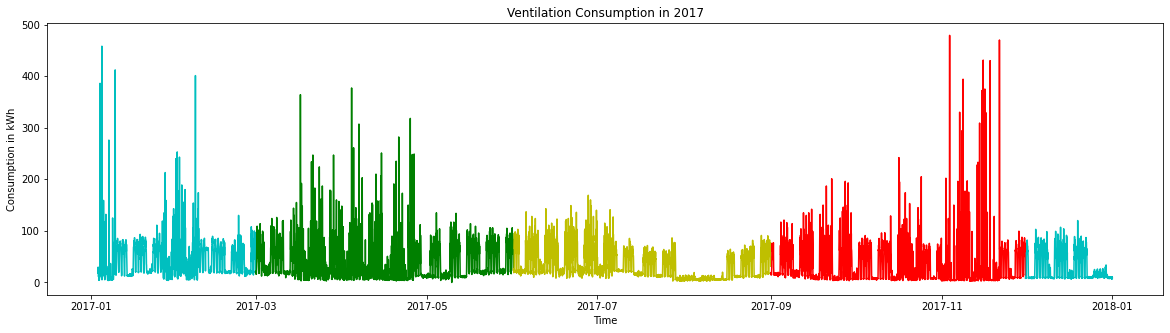

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Ventilation'], 'c')
ax.plot(a2['Time'], a2['Ventilation'], 'g')
ax.plot(a3['Time'], a3['Ventilation'], 'y')
ax.plot(a4['Time'], a4['Ventilation'], 'r')
ax.plot(a5['Time'], a5['Ventilation'], 'c')
ax.set_title('Ventilation Consumption in 2017')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2017 Sockets Plug consumption over different seasons

a = y2017.loc[:, ['Time','Month','Sokets plug']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Sokets plug']]
a2 = a2.loc[:, ['Time','Sokets plug']]
a3 = a3.loc[:, ['Time','Sokets plug']]
a4 = a4.loc[:, ['Time','Sokets plug']]
a5 = a5.loc[:, ['Time','Sokets plug']]


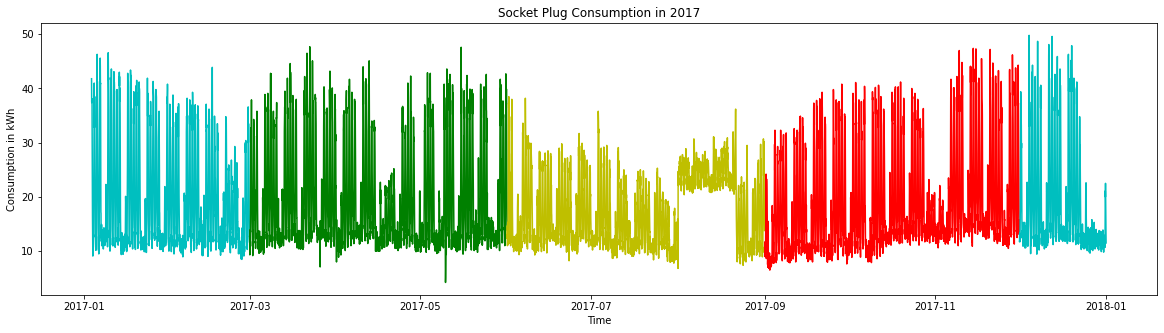

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Sokets plug'], 'c')
ax.plot(a2['Time'], a2['Sokets plug'], 'g')
ax.plot(a3['Time'], a3['Sokets plug'], 'y')
ax.plot(a4['Time'], a4['Sokets plug'], 'r')
ax.plot(a5['Time'], a5['Sokets plug'], 'c')
ax.set_title('Socket Plug Consumption in 2017')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()



In [ ]:
# 2017 Lighting consumption over different seasons

a = y2017.loc[:, ['Time','Month','Lighting']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Lighting']]
a2 = a2.loc[:, ['Time','Lighting']]
a3 = a3.loc[:, ['Time','Lighting']]
a4 = a4.loc[:, ['Time','Lighting']]
a5 = a5.loc[:, ['Time','Lighting']]

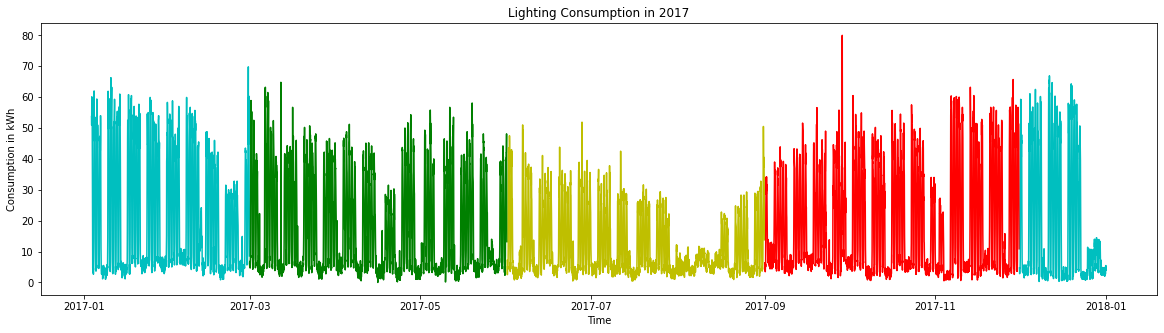

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Lighting'], 'c')
ax.plot(a2['Time'], a2['Lighting'], 'g')
ax.plot(a3['Time'], a3['Lighting'], 'y')
ax.plot(a4['Time'], a4['Lighting'], 'r')
ax.plot(a5['Time'], a5['Lighting'], 'c')
ax.set_title('Lighting Consumption in 2017')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()

In [ ]:
# 2017 Other electricity consumption over different seasons

a = y2017.loc[:, ['Time','Month','Other electricity']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Other electricity']]
a2 = a2.loc[:, ['Time','Other electricity']]
a3 = a3.loc[:, ['Time','Other electricity']]
a4 = a4.loc[:, ['Time','Other electricity']]
a5 = a5.loc[:, ['Time','Other electricity']]


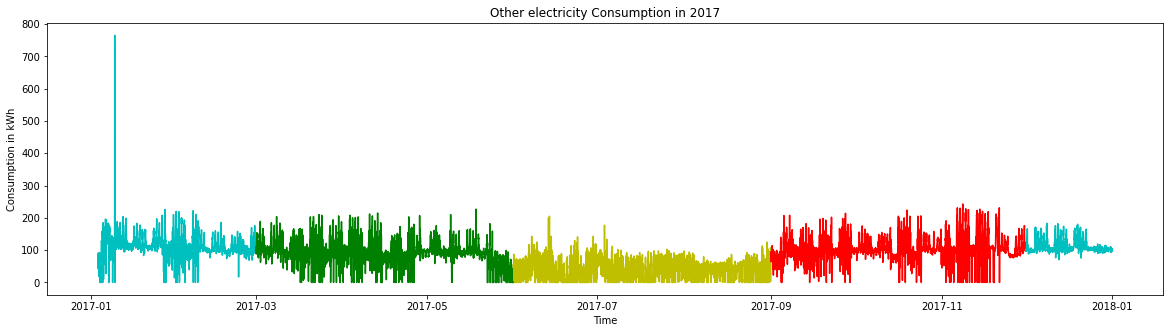

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Other electricity'], 'c')
ax.plot(a2['Time'], a2['Other electricity'], 'g')
ax.plot(a3['Time'], a3['Other electricity'], 'y')
ax.plot(a4['Time'], a4['Other electricity'], 'r')
ax.plot(a5['Time'], a5['Other electricity'], 'c')
ax.set_title('Other electricity Consumption in 2017')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2017 Cooling consumption over different seasons

a = y2017.loc[:, ['Time','Month','Cooling']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Cooling']]
a2 = a2.loc[:, ['Time','Cooling']]
a3 = a3.loc[:, ['Time','Cooling']]
a4 = a4.loc[:, ['Time','Cooling']]
a5 = a5.loc[:, ['Time','Cooling']]


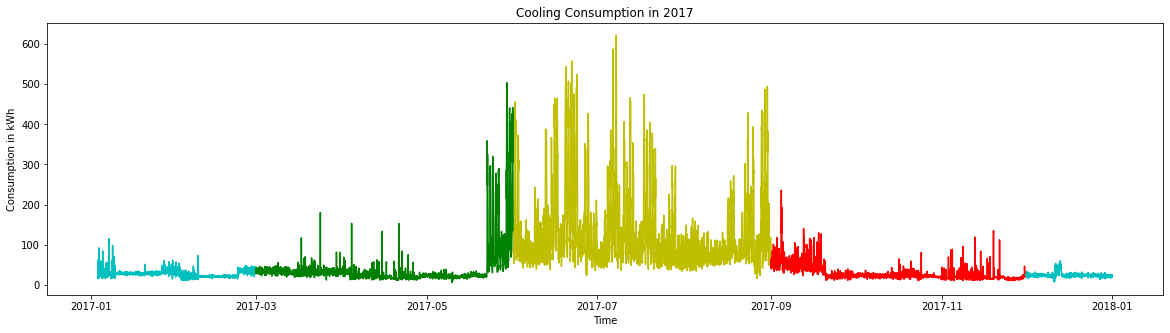

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Cooling'], 'c')
ax.plot(a2['Time'], a2['Cooling'], 'g')
ax.plot(a3['Time'], a3['Cooling'], 'y')
ax.plot(a4['Time'], a4['Cooling'], 'r')
ax.plot(a5['Time'], a5['Cooling'], 'c')
ax.set_title('Cooling Consumption in 2017')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2017 Heating consumption over different seasons

a = y2017.loc[:, ['Time','Month','Heating']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Heating']]
a2 = a2.loc[:, ['Time','Heating']]
a3 = a3.loc[:, ['Time','Heating']]
a4 = a4.loc[:, ['Time','Heating']]
a5 = a5.loc[:, ['Time','Heating']]


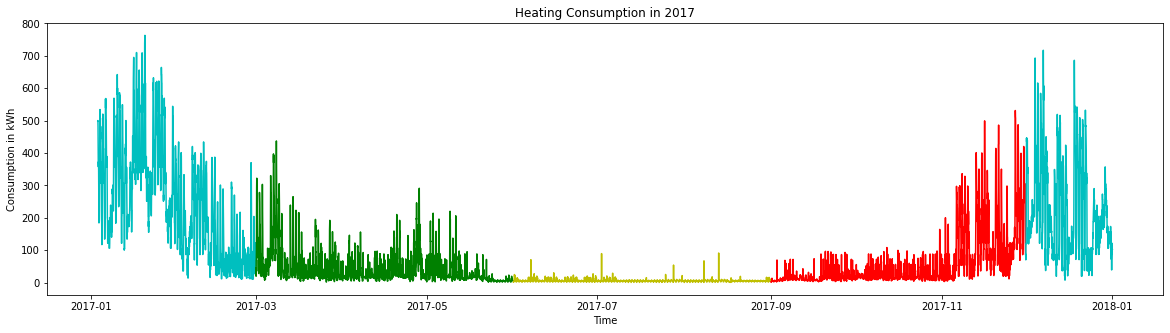

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Heating'], 'c')
ax.plot(a2['Time'], a2['Heating'], 'g')
ax.plot(a3['Time'], a3['Heating'], 'y')
ax.plot(a4['Time'], a4['Heating'], 'r')
ax.plot(a5['Time'], a5['Heating'], 'c')
ax.set_title('Heating Consumption in 2017')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


# **Other**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0309149a90>,
      dtype=object)

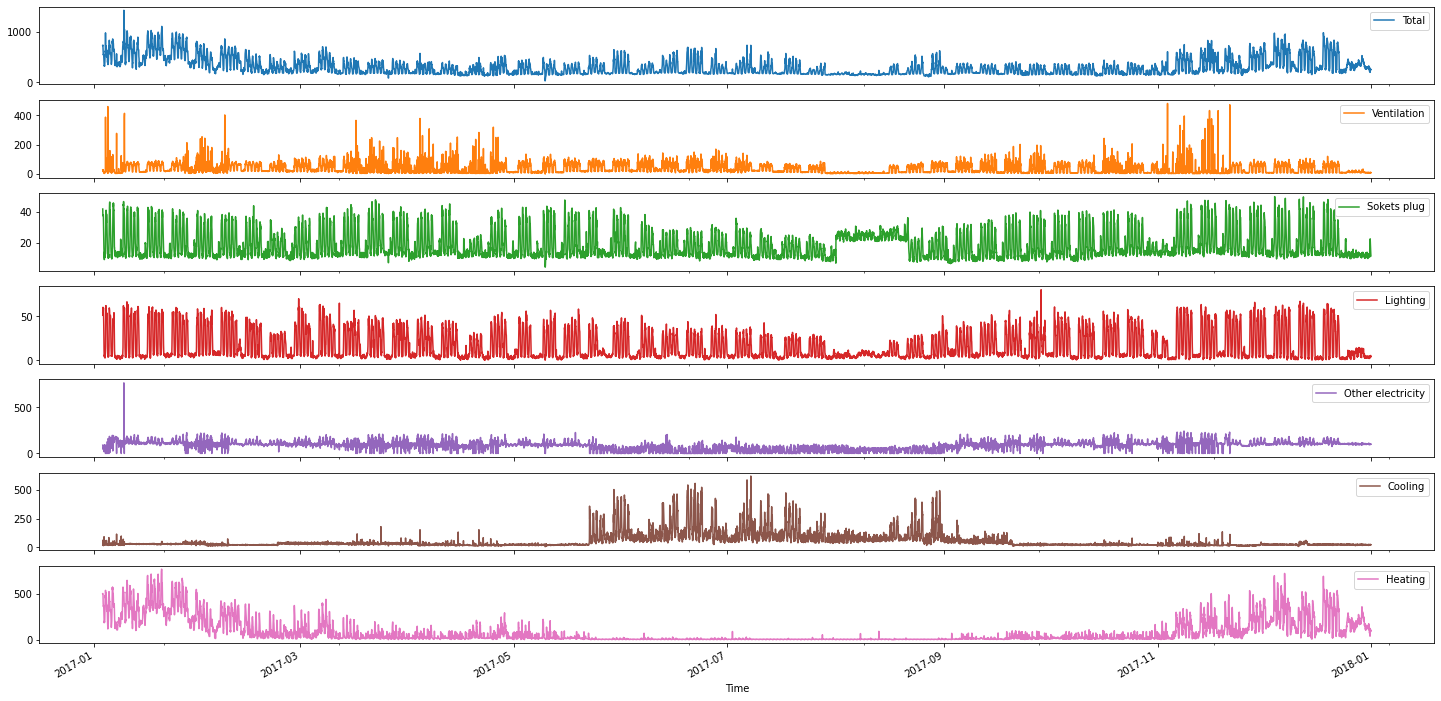

In [ ]:
mpl.rcParams['figure.figsize'] = (45,19)
mpl.rcParams['axes.grid'] = False

mpl.rcParams['figure.figsize'] = (25,13)
mpl.rcParams['axes.grid'] = False
y2017.set_index('Time')[['Total','Ventilation',	'Sokets plug', 'Lighting',	'Other electricity',	'Cooling',	'Heating']].plot(subplots=True)


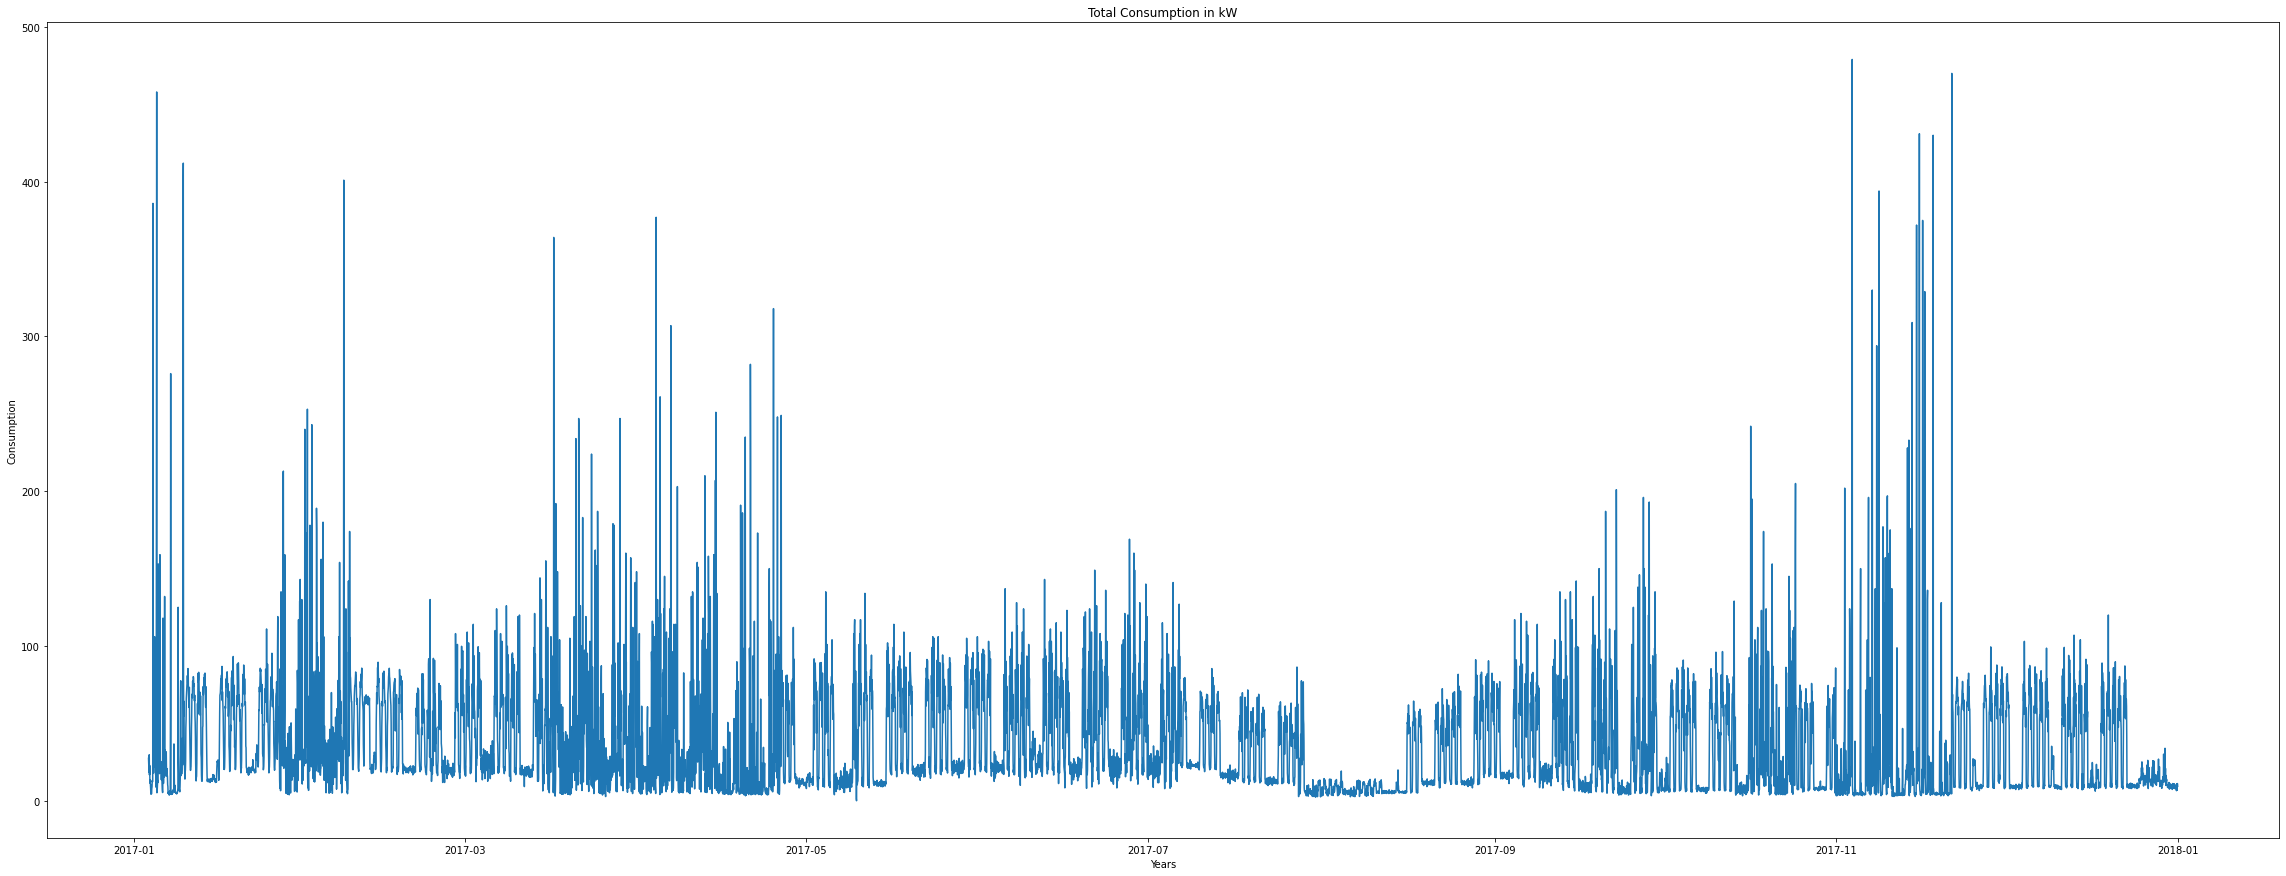

In [ ]:
fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(y2017['Time'], y2017['Ventilation'])
ax.set_title('Total Consumption in kW')
plt.xlabel('Years')
plt.ylabel('Consumption')
plt.show()

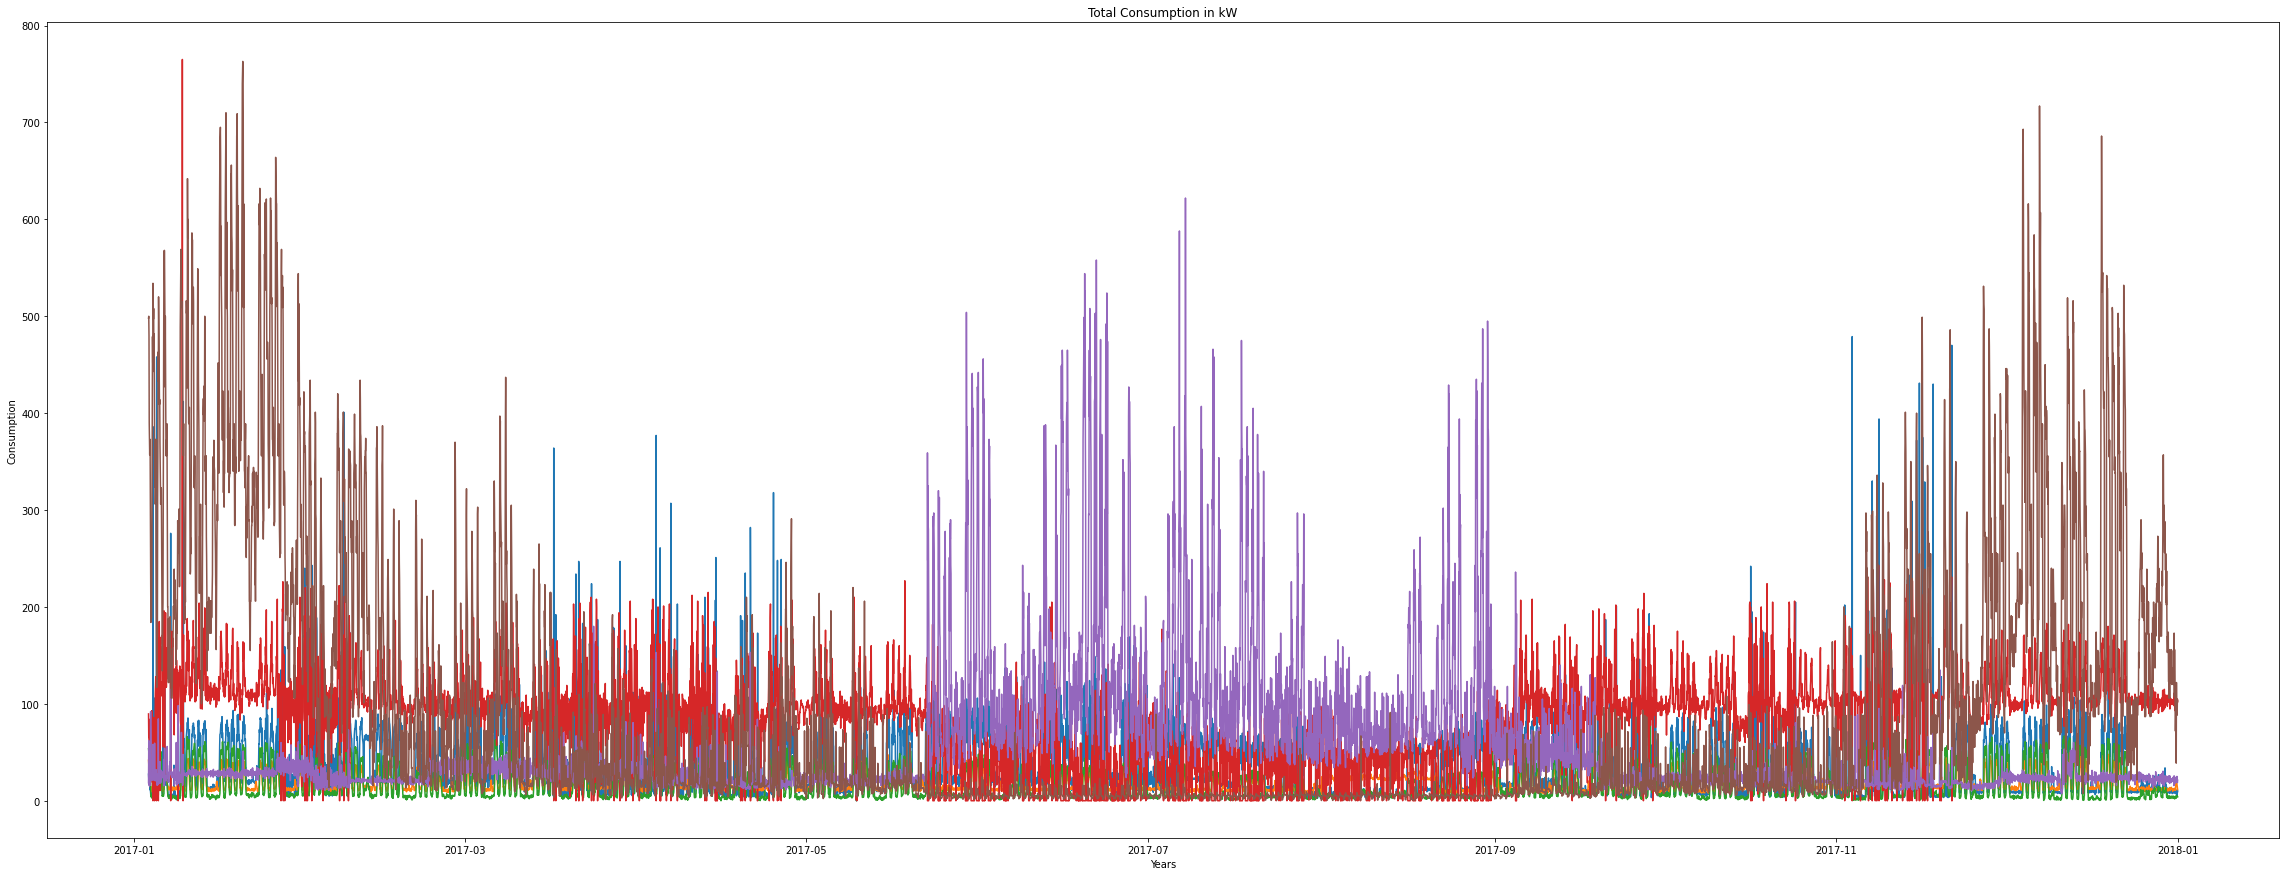

In [ ]:
fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(y2017['Time'], y2017['Ventilation'])
ax.plot(y2017['Time'], y2017['Sokets plug'])
ax.plot(y2017['Time'], y2017['Lighting'])
ax.plot(y2017['Time'], y2017['Other electricity'])
ax.plot(y2017['Time'], y2017['Cooling'])
ax.plot(y2017['Time'], y2017['Heating'])
ax.set_title('Total Consumption in kW')
plt.xlabel('Years')
plt.ylabel('Consumption')
plt.show()

# **Different Appliance Consumption in different Seasons of 2018**



In [ ]:
# 2018 ventilation consumption over different seasons

a = y2018.loc[:, ['Time','Month','Ventilation']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Ventilation']]
a2 = a2.loc[:, ['Time','Ventilation']]
a3 = a3.loc[:, ['Time','Ventilation']]
a4 = a4.loc[:, ['Time','Ventilation']]
a5 = a5.loc[:, ['Time','Ventilation']]

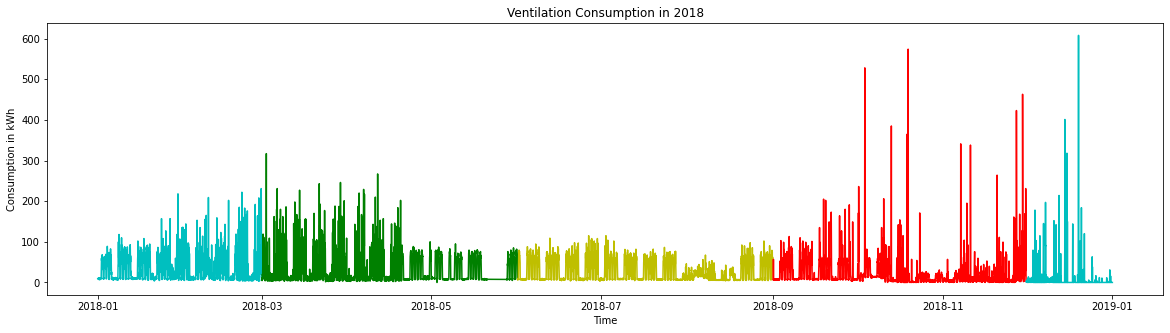

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Ventilation'], 'c')
ax.plot(a2['Time'], a2['Ventilation'], 'g')
ax.plot(a3['Time'], a3['Ventilation'], 'y')
ax.plot(a4['Time'], a4['Ventilation'], 'r')
ax.plot(a5['Time'], a5['Ventilation'], 'c')
ax.set_title('Ventilation Consumption in 2018')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2018 Sockets Plug consumption over different seasons

a = y2018.loc[:, ['Time','Month','Sokets plug']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Sokets plug']]
a2 = a2.loc[:, ['Time','Sokets plug']]
a3 = a3.loc[:, ['Time','Sokets plug']]
a4 = a4.loc[:, ['Time','Sokets plug']]
a5 = a5.loc[:, ['Time','Sokets plug']]


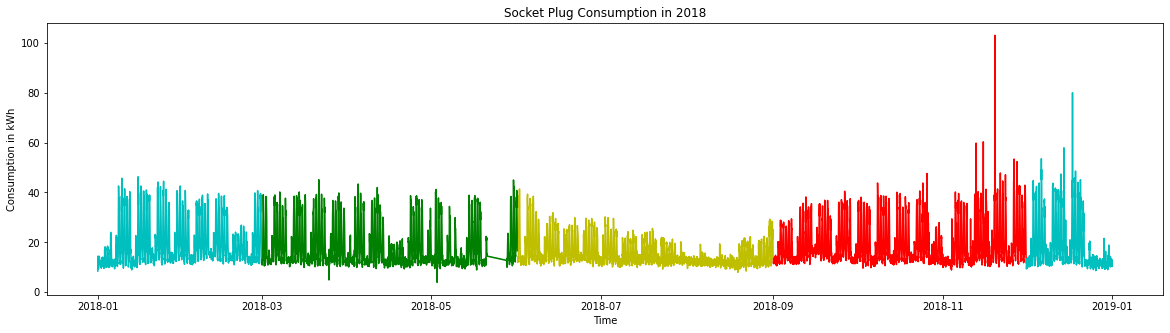

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Sokets plug'], 'c')
ax.plot(a2['Time'], a2['Sokets plug'], 'g')
ax.plot(a3['Time'], a3['Sokets plug'], 'y')
ax.plot(a4['Time'], a4['Sokets plug'], 'r')
ax.plot(a5['Time'], a5['Sokets plug'], 'c')
ax.set_title('Socket Plug Consumption in 2018')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()



In [ ]:
# 2018 Lighting consumption over different seasons

a = y2018.loc[:, ['Time','Month','Lighting']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Lighting']]
a2 = a2.loc[:, ['Time','Lighting']]
a3 = a3.loc[:, ['Time','Lighting']]
a4 = a4.loc[:, ['Time','Lighting']]
a5 = a5.loc[:, ['Time','Lighting']]

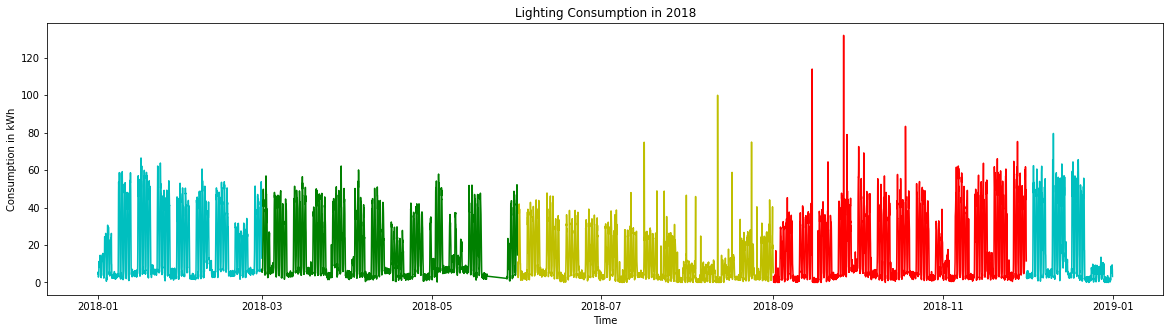

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Lighting'], 'c')
ax.plot(a2['Time'], a2['Lighting'], 'g')
ax.plot(a3['Time'], a3['Lighting'], 'y')
ax.plot(a4['Time'], a4['Lighting'], 'r')
ax.plot(a5['Time'], a5['Lighting'], 'c')
ax.set_title('Lighting Consumption in 2018')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()

In [ ]:
# 2018 Other electricity consumption over different seasons

a = y2018.loc[:, ['Time','Month','Other electricity']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Other electricity']]
a2 = a2.loc[:, ['Time','Other electricity']]
a3 = a3.loc[:, ['Time','Other electricity']]
a4 = a4.loc[:, ['Time','Other electricity']]
a5 = a5.loc[:, ['Time','Other electricity']]


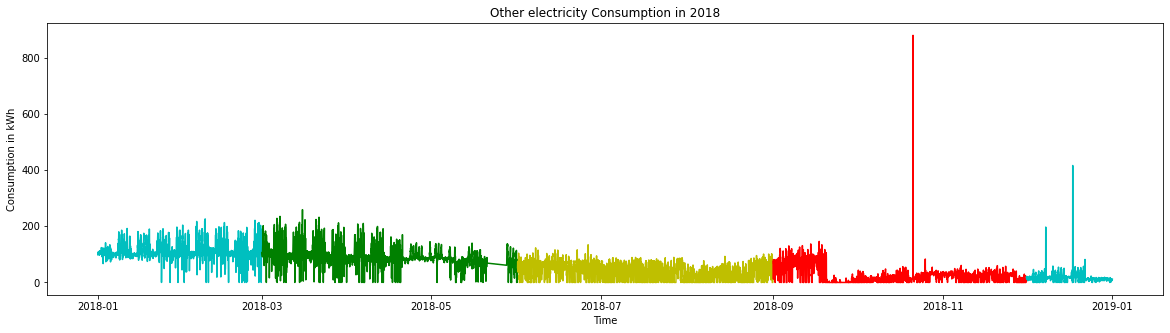

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Other electricity'], 'c')
ax.plot(a2['Time'], a2['Other electricity'], 'g')
ax.plot(a3['Time'], a3['Other electricity'], 'y')
ax.plot(a4['Time'], a4['Other electricity'], 'r')
ax.plot(a5['Time'], a5['Other electricity'], 'c')
ax.set_title('Other electricity Consumption in 2018')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2018 Cooling consumption over different seasons

a = y2018.loc[:, ['Time','Month','Cooling']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Cooling']]
a2 = a2.loc[:, ['Time','Cooling']]
a3 = a3.loc[:, ['Time','Cooling']]
a4 = a4.loc[:, ['Time','Cooling']]
a5 = a5.loc[:, ['Time','Cooling']]


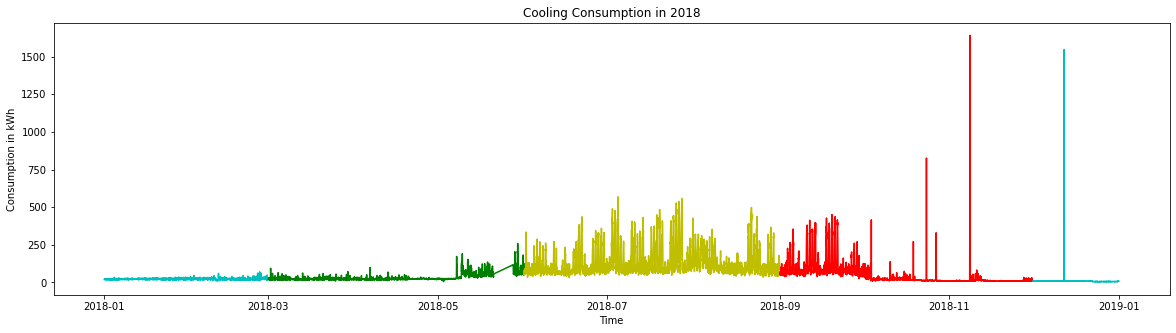

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Cooling'], 'c')
ax.plot(a2['Time'], a2['Cooling'], 'g')
ax.plot(a3['Time'], a3['Cooling'], 'y')
ax.plot(a4['Time'], a4['Cooling'], 'r')
ax.plot(a5['Time'], a5['Cooling'], 'c')
ax.set_title('Cooling Consumption in 2018')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2018 Heating consumption over different seasons

a = y2018.loc[:, ['Time','Month','Heating']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Heating']]
a2 = a2.loc[:, ['Time','Heating']]
a3 = a3.loc[:, ['Time','Heating']]
a4 = a4.loc[:, ['Time','Heating']]
a5 = a5.loc[:, ['Time','Heating']]


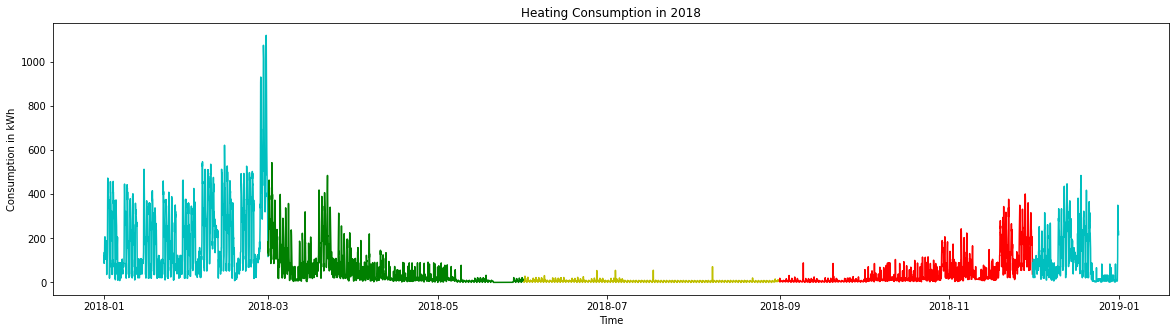

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Heating'], 'c')
ax.plot(a2['Time'], a2['Heating'], 'g')
ax.plot(a3['Time'], a3['Heating'], 'y')
ax.plot(a4['Time'], a4['Heating'], 'r')
ax.plot(a5['Time'], a5['Heating'], 'c')
ax.set_title('Heating Consumption in 2018')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


# **Different Appliance Consumption in different Seasons of 2019**


In [ ]:
# 2019 ventilation consumption over different seasons

a = y2019.loc[:, ['Time','Month','Ventilation']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Ventilation']]
a2 = a2.loc[:, ['Time','Ventilation']]
a3 = a3.loc[:, ['Time','Ventilation']]
a4 = a4.loc[:, ['Time','Ventilation']]
a5 = a5.loc[:, ['Time','Ventilation']]

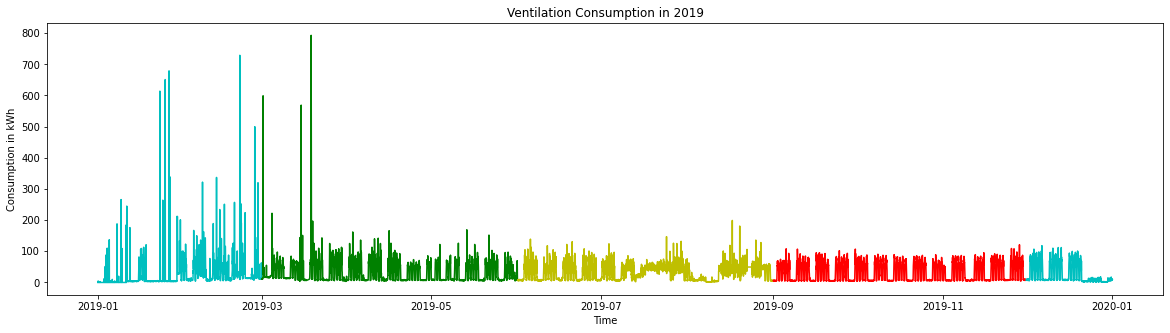

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Ventilation'], 'c')
ax.plot(a2['Time'], a2['Ventilation'], 'g')
ax.plot(a3['Time'], a3['Ventilation'], 'y')
ax.plot(a4['Time'], a4['Ventilation'], 'r')
ax.plot(a5['Time'], a5['Ventilation'], 'c')
ax.set_title('Ventilation Consumption in 2019')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2019 Sockets Plug consumption over different seasons

a = y2019.loc[:, ['Time','Month','Sokets plug']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Sokets plug']]
a2 = a2.loc[:, ['Time','Sokets plug']]
a3 = a3.loc[:, ['Time','Sokets plug']]
a4 = a4.loc[:, ['Time','Sokets plug']]
a5 = a5.loc[:, ['Time','Sokets plug']]


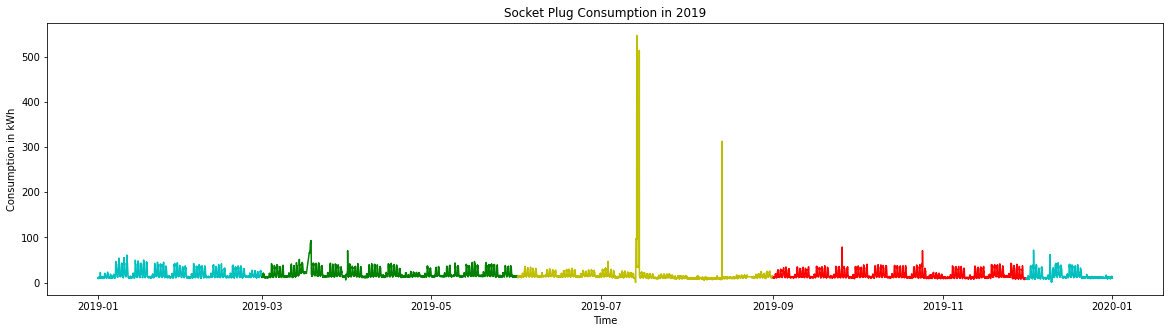

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Sokets plug'], 'c')
ax.plot(a2['Time'], a2['Sokets plug'], 'g')
ax.plot(a3['Time'], a3['Sokets plug'], 'y')
ax.plot(a4['Time'], a4['Sokets plug'], 'r')
ax.plot(a5['Time'], a5['Sokets plug'], 'c')
ax.set_title('Socket Plug Consumption in 2019')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()



In [ ]:
# 2019 Lighting consumption over different seasons

a = y2019.loc[:, ['Time','Month','Lighting']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Lighting']]
a2 = a2.loc[:, ['Time','Lighting']]
a3 = a3.loc[:, ['Time','Lighting']]
a4 = a4.loc[:, ['Time','Lighting']]
a5 = a5.loc[:, ['Time','Lighting']]

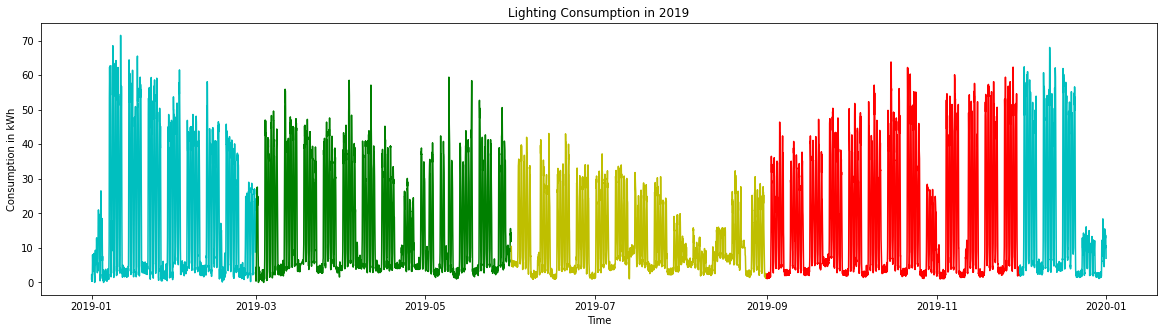

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Lighting'], 'c')
ax.plot(a2['Time'], a2['Lighting'], 'g')
ax.plot(a3['Time'], a3['Lighting'], 'y')
ax.plot(a4['Time'], a4['Lighting'], 'r')
ax.plot(a5['Time'], a5['Lighting'], 'c')
ax.set_title('Lighting Consumption in 2019')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()

In [ ]:
# 2019 Other electricity consumption over different seasons

a = y2019.loc[:, ['Time','Month','Other electricity']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Other electricity']]
a2 = a2.loc[:, ['Time','Other electricity']]
a3 = a3.loc[:, ['Time','Other electricity']]
a4 = a4.loc[:, ['Time','Other electricity']]
a5 = a5.loc[:, ['Time','Other electricity']]


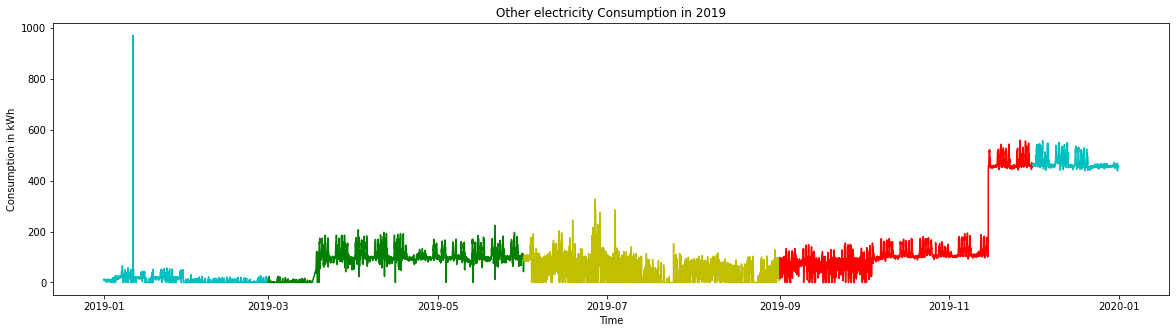

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Other electricity'], 'c')
ax.plot(a2['Time'], a2['Other electricity'], 'g')
ax.plot(a3['Time'], a3['Other electricity'], 'y')
ax.plot(a4['Time'], a4['Other electricity'], 'r')
ax.plot(a5['Time'], a5['Other electricity'], 'c')
ax.set_title('Other electricity Consumption in 2019')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2019 Cooling consumption over different seasons

a = y2019.loc[:, ['Time','Month','Cooling']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Cooling']]
a2 = a2.loc[:, ['Time','Cooling']]
a3 = a3.loc[:, ['Time','Cooling']]
a4 = a4.loc[:, ['Time','Cooling']]
a5 = a5.loc[:, ['Time','Cooling']]


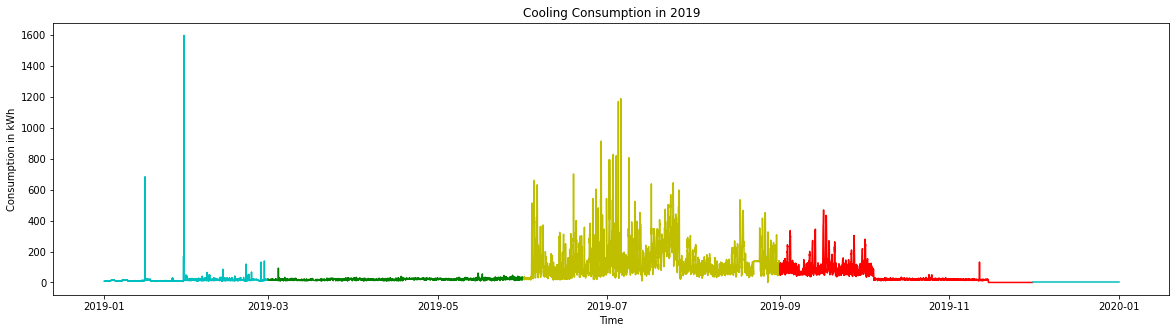

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Cooling'], 'c')
ax.plot(a2['Time'], a2['Cooling'], 'g')
ax.plot(a3['Time'], a3['Cooling'], 'y')
ax.plot(a4['Time'], a4['Cooling'], 'r')
ax.plot(a5['Time'], a5['Cooling'], 'c')
ax.set_title('Cooling Consumption in 2019')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
# 2019 Heating consumption over different seasons

a = y2019.loc[:, ['Time','Month','Heating']]

a1 = a.loc[(a['Month'].isin([1,2]))]
a2 = a.loc[(a['Month'].isin([3,4,5]))]
a3 = a.loc[(a['Month'].isin([6,7,8]))]
a4 = a.loc[(a['Month'].isin([9,10,11]))]
a5 = a.loc[(a['Month'].isin([12]))]
a1 = a1.loc[:, ['Time','Heating']]
a2 = a2.loc[:, ['Time','Heating']]
a3 = a3.loc[:, ['Time','Heating']]
a4 = a4.loc[:, ['Time','Heating']]
a5 = a5.loc[:, ['Time','Heating']]


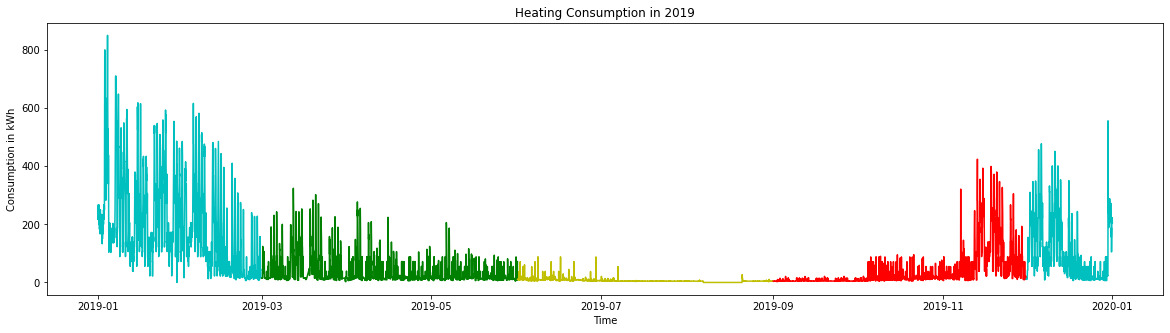

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a1['Time'], a1['Heating'], 'c')
ax.plot(a2['Time'], a2['Heating'], 'g')
ax.plot(a3['Time'], a3['Heating'], 'y')
ax.plot(a4['Time'], a4['Heating'], 'r')
ax.plot(a5['Time'], a5['Heating'], 'c')
ax.set_title('Heating Consumption in 2019')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()


In [ ]:
y2017

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Day,Month,Week,Year,Hour,Day of week,Day of year,Quarter
0,2017-01-03 13:00:00,27.40,41.8,53.70,89.6,18.6,498.0,729.10,3,1,1,2017,13,1,3,1
1,2017-01-03 14:00:00,21.60,37.5,50.90,64.6,61.9,500.0,736.50,3,1,1,2017,14,1,3,1
2,2017-01-03 15:00:00,18.50,37.4,60.10,64.2,16.5,480.0,676.70,3,1,1,2017,15,1,3,1
3,2017-01-03 16:00:00,29.70,38.0,52.60,43.2,19.8,390.0,573.30,3,1,1,2017,16,1,3,1
4,2017-01-03 17:00:00,16.70,38.1,56.70,42.4,15.2,373.0,542.10,3,1,1,2017,17,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,2017-12-31 19:00:00,10.90,19.7,4.38,104.0,20.3,88.4,247.68,31,12,52,2017,19,6,365,4
8695,2017-12-31 20:00:00,10.50,17.6,4.69,96.1,25.1,105.0,258.99,31,12,52,2017,20,6,365,4
8696,2017-12-31 21:00:00,6.75,15.8,5.47,102.0,20.0,88.5,238.52,31,12,52,2017,21,6,365,4
8697,2017-12-31 22:00:00,11.10,13.2,3.97,105.0,18.7,104.0,255.97,31,12,52,2017,22,6,365,4


In [ ]:
y2018

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Day,Month,Week,Year,Hour,Day of week,Day of year,Quarter
8699,2018-01-01 00:00:00,9.38,8.44,4.63,104.00,22.60,120.0,269.05,1,1,1,2018,0,0,1,1
8700,2018-01-01 01:00:00,9.69,12.80,5.53,97.40,22.10,86.5,234.02,1,1,1,2018,1,0,1,1
8701,2018-01-01 02:00:00,9.44,14.50,5.53,98.60,18.40,120.0,266.47,1,1,1,2018,2,0,1,1
8702,2018-01-01 03:00:00,9.19,10.20,4.09,102.00,22.50,137.0,284.98,1,1,1,2018,3,0,1,1
8703,2018-01-01 04:00:00,10.30,11.00,2.84,104.00,22.40,104.0,254.54,1,1,1,2018,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17454,2018-12-31 19:00:00,0.00,11.70,7.50,11.60,8.69,250.0,289.49,31,12,1,2018,19,0,365,4
17455,2018-12-31 20:00:00,0.00,10.90,9.38,10.50,8.75,234.0,273.53,31,12,1,2018,20,0,365,4
17456,2018-12-31 21:00:00,0.00,12.00,8.06,7.50,10.40,233.0,270.96,31,12,1,2018,21,0,365,4
17457,2018-12-31 22:00:00,0.00,10.30,6.75,9.63,10.90,234.0,271.58,31,12,1,2018,22,0,365,4


In [ ]:
sum2017

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Day,Month,Week,Year,Hour,Day of week,Day of year,Quarter
3562,2017-06-01 00:00:00,25.9,12.9,7.13,54.00,76.9,1.63,178.46,1,6,22,2017,0,3,152,2
3563,2017-06-01 01:00:00,22.3,12.3,4.19,44.00,89.0,2.88,174.67,1,6,22,2017,1,3,152,2
3564,2017-06-01 02:00:00,21.9,14.7,2.53,75.30,57.5,3.00,174.93,1,6,22,2017,2,3,152,2
3565,2017-06-01 03:00:00,18.8,11.0,3.63,87.30,52.6,3.13,176.46,1,6,22,2017,3,3,152,2
3566,2017-06-01 04:00:00,24.6,11.8,5.22,4.70,126.0,2.75,175.07,1,6,22,2017,4,3,152,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,2017-08-31 19:00:00,65.0,24.7,36.80,63.40,91.9,5.00,286.80,31,8,35,2017,19,3,243,3
5766,2017-08-31 20:00:00,77.1,21.4,30.80,66.50,57.7,5.50,259.00,31,8,35,2017,20,3,243,3
5767,2017-08-31 21:00:00,49.1,15.1,20.60,107.00,49.2,5.00,246.00,31,8,35,2017,21,3,243,3
5768,2017-08-31 22:00:00,49.8,15.0,17.50,82.50,48.4,4.75,217.95,31,8,35,2017,22,3,243,3


In [ ]:
sum2018

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Day,Month,Week,Year,Hour,Day of week,Day of year,Quarter
12322,2018-06-01 00:00:00,6.94,12.5,10.80,52.40,77.8,3.750,164.190,1,6,22,2018,0,4,152,2
12323,2018-06-01 01:00:00,6.06,11.9,7.84,73.90,50.3,0.750,150.750,1,6,22,2018,1,4,152,2
12324,2018-06-01 02:00:00,8.88,13.3,6.16,68.60,53.6,0.375,150.915,1,6,22,2018,2,4,152,2
12325,2018-06-01 03:00:00,8.69,14.1,4.91,70.90,51.4,0.750,150.750,1,6,22,2018,3,4,152,2
12326,2018-06-01 04:00:00,7.44,13.0,2.63,72.70,55.8,3.750,155.320,1,6,22,2018,4,4,152,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14525,2018-08-31 19:00:00,49.30,21.4,19.60,0.00,163.0,7.130,260.430,31,8,35,2018,19,4,243,3
14526,2018-08-31 20:00:00,38.40,25.1,16.60,5.16,152.0,6.750,244.010,31,8,35,2018,20,4,243,3
14527,2018-08-31 21:00:00,37.10,18.1,10.80,23.50,142.0,7.250,238.750,31,8,35,2018,21,4,243,3
14528,2018-08-31 22:00:00,25.10,15.0,7.63,33.30,116.0,7.380,204.410,31,8,35,2018,22,4,243,3


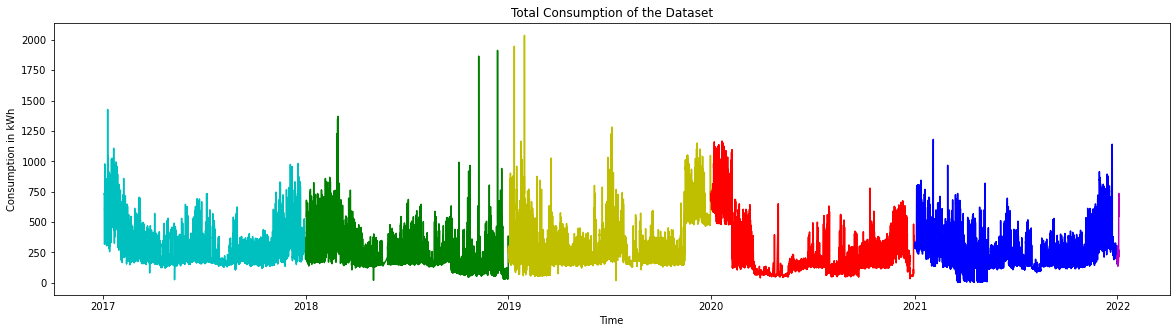

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(y2017['Time'], y2017['Total'], 'c')
ax.plot(y2018['Time'], y2018['Total'], 'g')
ax.plot(y2019['Time'], y2019['Total'], 'y')
ax.plot(y2020['Time'], y2020['Total'], 'r')
ax.plot(y2021['Time'], y2021['Total'], 'b')
ax.plot(y2022['Time'], y2022['Total'], 'm')
ax.set_title('Total Consumption of the Dataset')
plt.xlabel('Time')
plt.ylabel('Consumption in kWh')
plt.show()

In [ ]:
y2017 = df.loc[(df['Year'].isin([2017]))]
y2018 = df.loc[(df['Year'].isin([2018]))]
y2019 = df.loc[(df['Year'].isin([2019]))]
y2020 = df.loc[(df['Year'].isin([2020]))]
y2021 = df.loc[(df['Year'].isin([2021]))]
y2022 = df.loc[(df['Year'].isin([2022]))]